In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os

if not os.path.isdir('model_data'):
    os.makedirs('model_data')

if not os.path.isdir('dataset'):
    os.makedirs('dataset')
    

if not os.path.isdir('dataset/training_set'):
    os.makedirs('dataset/training_set')

### Download and Extract Dataset

In [ ]:
import urllib.request

def download_model(url, dest):
  if not os.path.isfile(dest):
    print("Download file: " + url + " to " + dest)
    urllib.request.urlretrieve(url,dest)
    print("File downloaded")
  else:
    print("File already exists. Skipping Download")


In [ ]:
# test_data_url = "https://bitbucket.org/saniaj22/thesis-deep-learning/raw/057cfa4b1518900b270547773d7d8ca280182d68/dataset/test_set.zip"
# zip_file_dest = "/content/dataset/test_data.zip"
# download_model(test_data_url, zip_file_dest)
%cd /content/dataset

/content/dataset


In [ ]:


# !unzip training_data1.zip
# !unzip training_data2.zip
!unzip test_data.zip
# !unzip validation_data.zip
# !unzip aug_data.zip

Archive:  test_data.zip
   creating: test_set/
  inflating: test_set/2523348f-0000000.jpg  
  inflating: test_set/78318588-0000000.jpg  
  inflating: test_set/968ac050-0000000.jpg  
  inflating: test_set/d7d2a7be-0000000.jpg  
  inflating: test_set/bebfe4d0-0000000.jpg  
  inflating: test_set/72a0b094-0000000.jpg  
  inflating: test_set/e6d4691d-0000000.jpg  
  inflating: test_set/7c9d8cbd-0000000.jpg  
  inflating: test_set/218fe9ef-0000000.jpg  
  inflating: test_set/305b30fc-0000000.jpg  
  inflating: test_set/9218edb1-0000000.jpg  
  inflating: test_set/a5ece960-0000000.jpg  
  inflating: test_set/37d5d82e-0000000.jpg  
  inflating: test_set/21aa0609-0000000.jpg  
  inflating: test_set/b9063574-0000000.jpg  
  inflating: test_set/13719792-0000000.jpg  
  inflating: test_set/631b1093-0000000.jpg  
  inflating: test_set/7a27f07d-0000000.jpg  
  inflating: test_set/a24f5a93-0000000.jpg  
  inflating: test_set/18980e41-0000000.jpg  
  inflating: test_set/a1dd2489-0000000.jpg  
  inflat

In [ ]:
!mv training_set1/*.jpg training_set/
!mv training_set2/*.jpg training_set/

In [ ]:
!rm -r training_set1/
!rm -r training_set2/

In [ ]:
!wget https://bitbucket.org/saniaj22/thesis-part2/raw/a2edff924eb494363624e03dbe17b121439f5040/training_annotations.txt
!wget https://bitbucket.org/saniaj22/thesis-part2/raw/c8d999770626e789ccf7c5d7e028509e2e30c72a/validation_annotations.txt
!wget https://bitbucket.org/saniaj22/thesis-part2/raw/c8d999770626e789ccf7c5d7e028509e2e30c72a/test_annotations.txt
!wget https://bitbucket.org/saniaj22/thesis-part2/raw/f2a81a4c99d8040174fc53beaf95b618184db531/classes.txt

--2020-08-26 07:51:56--  https://bitbucket.org/saniaj22/thesis-part2/raw/a2edff924eb494363624e03dbe17b121439f5040/training_annotations.txt
Resolving bitbucket.org (bitbucket.org)... 18.205.93.1, 18.205.93.2, 18.205.93.0, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 237971 (232K) [text/plain]
Saving to: ‘training_annotations.txt’

training_annotation 100%[===================>] 232.39K  --.-KB/s    in 0.05s   

2020-08-26 07:51:56 (4.44 MB/s) - ‘training_annotations.txt’ saved [237971/237971]

--2020-08-26 07:51:56--  https://bitbucket.org/saniaj22/thesis-part2/raw/c8d999770626e789ccf7c5d7e028509e2e30c72a/validation_annotations.txt
Resolving bitbucket.org (bitbucket.org)... 18.205.93.1, 18.205.93.2, 18.205.93.0, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49451 (48K) [text/plain]
Saving to: ‘validation_annotatio

In [ ]:
#!mv training_annotations.txt dataset/

In [ ]:
%cd /content/

/content


### HOG + SVM Classifier

In [ ]:
!pip install scikit-image

In [ ]:
#importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

### NORMALISE IMAGES

In [ ]:
train_file = "dataset/training_annotations.txt"
val_file = "dataset/validation_annotations.txt"
# test_file = "/content/dataset/test_annotations.txt"
test_file = "/content/dataset/test_annotations_rescaled.txt"
test_file = "/content/dataset/validation_annotations_rescaled.txt"
dataType="validation"
final_imgs = "/content/dataset/".format(dataType)

def read_img_paths(file, labeldirectory, dataType):
    f = open(labeldirectory+dataType+'_rescaled_annotations_normalised'+'.txt',"a")
    with open(file) as fp:
        fp.seek(0, 0)
        line = fp.readline()
        while line:
            if (("aug_images" not in line)):
              data = line.strip().split(" ")
              imgName = data[0]
              img = cv2.imread(imgName)
              # print(img.shape)
              # img_ht, img_wt, _ = img.shape
              img_ht, img_wt, _ = 1000, 1000, 4
              # print(data[1:])
              box_str = imgName
              for boxes in data[1:]:
                  box_info = boxes.split(',')
                  if (int(box_info[0]) < 0):
                      box_info[0] = '0'
                  # if (int(box_info[0]) >= img_wt):
                  #     box_info[0] = '{}'.format(img_wt-5)
                  if (int(box_info[1]) < 0):
                      box_info[1] = '0'
                  # if (int(box_info[1]) >= img_ht):
                  #     box_info[1] = '{}'.format(img_ht-5)
                  if (int(box_info[2]) > img_wt):
                      box_info[2] = '{}'.format(img_wt)
                  if (int(box_info[3]) > img_ht):
                      box_info[3] = '{}'.format(img_ht)
                  box_str += " " + (',').join(box_info)
  #             image_paths.append(origDirectory+line.strip())
              # print(box_str)
              f.write(box_str+"\n")
            line = fp.readline()
read_img_paths(test_file, final_imgs, dataType)
# print(imagePaths[1], len(imagePaths))

In [ ]:
# !rm -r "/content/gdrive/My Drive/CNHIinternship/hog_dataset/train/wheat_imgs/"
# !rm -r "/content/gdrive/My Drive/CNHIinternship/hog_dataset/train/not_wheat_imgs/"
file_name = final_imgs+dataType+'_annotations'+'.txt'
file_name_normalised = final_imgs+dataType+'_annotations_normalised'+'.txt'

In [ ]:
bboxes = np.array([[992,1675,1068,1767,0],
[9,1830,67,1915,0],
[62,1868,100,1941,0],
[668,1724,727,1769,0],
[741,1609,795,1686,0],
[508,1621,541,1667,0],
[143,1415,218,1474,0],
[1089,1788,1180,1839,0],
[1183,1560,1255,1632,0],
[1414,1913,1459,1945,0],
[1427,1785,1479,1854,0],
[1394,1726,1464,1789,0],
[1420,1404,1507,1464,0],
[1431,1446,1526,1487,0],
[1707,1530,1781,1576,0],
[1672,1426,1733,1461,0],
[1572,1700,1625,1802,0],
[339,491,419,551,0],
[438,707,507,787,0],
[582,736,671,793,0],
[792,1012,859,1077,0],
[941,999,982,1078,0],
[776,1143,854,1204,0],
[942,1084,971,1137,0],
[968,1155,1042,1214,0],
[1359,967,1455,1019,0],
[476,1452,517,1535,0],
[407,1438,454,1470,0],
[659,425,738,468,0]]).astype(np.float64)
RESCALE_INPUT_HT = 1000
RESCALE_INPUT_WT = 1000

def rescale_bboxes(bboxes, inp_dim):
    w,h = 1948, 1947
    scale = min(inp_dim/h, inp_dim/w)
    bboxes[:,:4] *= (scale)

    new_w = scale*w
    new_h = scale*h
    inp_dim = inp_dim   

    del_h = (inp_dim - new_h)/2
    del_w = (inp_dim - new_w)/2

    add_matrix = np.array([[del_w, del_h, del_w, del_h]]).astype(int)

    bboxes[:,:4] += add_matrix
    return(bboxes)
    
def rescale_annotations():
    # filename = file_name_normalised
    filename = file_name
    f = open(filename, 'r')
    file_name_rescaled = file_name.split(".")[0]+"_rescaled.txt"
    f2 = open(file_name_rescaled, 'w')
    for line in f:
        line=line.replace("My Drive","MyDrive")
        data = line.strip().split(" ")
        imgName = data[0]
        imgName=imgName.replace("MyDrive", "My Drive")
        # data = line.strip().split(" ")
        bboxes= np.array([np.fromstring(s[0:], dtype=np.int, sep=',') for s in data[1:]]).astype(np.float64)
        print("Original:",bboxes)
        rescaled = rescale_bboxes(bboxes.copy(), RESCALE_INPUT_HT)
        print("Rescaled:",rescaled)

        # print(bboxes)
        # print("R: \n",rescaled)
        img_str = imgName
        for i in rescaled:
          a_str = ','.join(str(int(x)) for x in i)
          print(a_str)
          img_str += " "+a_str
          # for j in i:
          #   print(i, str(i))
          #   img_str += (','.join(str(j)))
        print(img_str)
        f2.write(img_str+"\n")
        # length = len(infos)
        # dataset = []
        # for i in range(1, length):
          # bboxes = (infos[i].split(","))
        # dataset.append(bboxes)
        # print("Infos: ",dataset)
        print("New Image:")
    f2.close()
    # print(dataset)

rescale_annotations()

Streaming output truncated to the last 5000 lines.
 [1277. 1614. 1367. 1669.    0.]
 [1324. 1562. 1383. 1622.    0.]
 [ 837. 1865.  895. 1923.    0.]
 [ 758. 1807.  815. 1859.    0.]
 [ 675. 1770.  723. 1858.    0.]
 [ 523. 1381.  583. 1451.    0.]
 [ 748. 1319.  815. 1363.    0.]
 [ 808. 1287.  850. 1325.    0.]
 [ 977. 1186. 1015. 1249.    0.]
 [ 675. 1191.  726. 1252.    0.]
 [ 430. 1152.  478. 1230.    0.]
 [ 183. 1241.  243. 1307.    0.]
 [ 178. 1435.  233. 1506.    0.]
 [ 633. 1163.  676. 1205.    0.]
 [ 813. 1040.  869. 1093.    0.]
 [ 840. 1061.  900. 1112.    0.]
 [1308.  738. 1349.  806.    0.]
 [1336.  658. 1419.  706.    0.]
 [1086.  669. 1149.  725.    0.]
 [1417.  583. 1491.  640.    0.]
 [1360.  389. 1411.  447.    0.]
 [1513.  469. 1550.  522.    0.]
 [1797.  346. 1875.  396.    0.]
 [1552.  245. 1629.  296.    0.]
 [1598.  198. 1665.  243.    0.]
 [ 595.   99.  643.  169.    0.]
 [1690.  106. 1767.  144.    0.]
 [1609.    0. 1681.   38.    0.]]
Rescaled: [[779.26078029

### Anchor Boxes using Kmeans

In [ ]:
import numpy as np
main_dir = "/content/gdrive/My Drive/CNHIinternship/hog_dataset/"
anchors_path = main_dir+"anchors.txt"

class YOLO_Kmeans:

    def __init__(self, cluster_number, filename):
        self.cluster_number = cluster_number
        self.filename = file_name.split(".")[0]+"_rescaled.txt"
        print(self.filename)
        # self.filename = file_name

    def iou(self, boxes, clusters):  # 1 box -> k clusters
        n = boxes.shape[0]
        k = self.cluster_number

        box_area = boxes[:, 0] * boxes[:, 1]
        box_area = box_area.repeat(k)
        box_area = np.reshape(box_area, (n, k))

        cluster_area = clusters[:, 0] * clusters[:, 1]
        cluster_area = np.tile(cluster_area, [1, n])
        cluster_area = np.reshape(cluster_area, (n, k))

        box_w_matrix = np.reshape(boxes[:, 0].repeat(k), (n, k))
        cluster_w_matrix = np.reshape(np.tile(clusters[:, 0], (1, n)), (n, k))
        min_w_matrix = np.minimum(cluster_w_matrix, box_w_matrix)

        box_h_matrix = np.reshape(boxes[:, 1].repeat(k), (n, k))
        cluster_h_matrix = np.reshape(np.tile(clusters[:, 1], (1, n)), (n, k))
        min_h_matrix = np.minimum(cluster_h_matrix, box_h_matrix)
        inter_area = np.multiply(min_w_matrix, min_h_matrix)

        result = inter_area / (box_area + cluster_area - inter_area)
        return result

    def avg_iou(self, boxes, clusters):
        accuracy = np.mean([np.max(self.iou(boxes, clusters), axis=1)])
        return accuracy

    def kmeans(self, boxes, k, dist=np.median):
        box_number = boxes.shape[0]
        distances = np.empty((box_number, k))
        last_nearest = np.zeros((box_number,))
        np.random.seed()
        clusters = boxes[np.random.choice(
            box_number, k, replace=False)]  # init k clusters
        while True:

            distances = 1 - self.iou(boxes, clusters)

            current_nearest = np.argmin(distances, axis=1)
            if (last_nearest == current_nearest).all():
                break  # clusters won't change
            for cluster in range(k):
                clusters[cluster] = dist(  # update clusters
                    boxes[current_nearest == cluster], axis=0)

            last_nearest = current_nearest

        return clusters

    def result2txt(self, data):
        f = open(anchors_path, 'w')
        row = np.shape(data)[0]
        for i in range(row):
            if i == 0:
                x_y = "%d,%d" % (data[i][0], data[i][1])
            else:
                x_y = ", %d,%d" % (data[i][0], data[i][1])
            f.write(x_y)
        f.close()

    def txt2boxes(self):
        f = open(self.filename, 'r')
        dataSet = []
        for line in f:
            line=line.replace("My Drive","MyDrive")
            data = line.strip().split(" ")
            imgName = data[0]
            imgName=imgName.replace("MyDrive", "My Drive")
            infos = line.split(" ")
            length = len(infos)
            print(infos)
            for i in range(1, length):
                width = int(infos[i].split(",")[2]) - \
                    int(infos[i].split(",")[0])
                height = int(infos[i].split(",")[3]) - \
                    int(infos[i].split(",")[1])
                if width > 0 and height > 0:
                  dataSet.append([width, height])
        result = np.array(dataSet)
        f.close()
        return result

    def txt2clusters(self):
        all_boxes = self.txt2boxes()
        print(all_boxes)
        result = self.kmeans(all_boxes, k=self.cluster_number)
        result = result[np.lexsort(result.T[0, None])]
        self.result2txt(result)
        print("K anchors:\n {}".format(result))
        print("Accuracy: {:.2f}%".format(
            self.avg_iou(all_boxes, result) * 100))

def calculate_anchor_boxes():
    cluster_number = 9
    filename = file_name_normalised
    # Row format: image_file_path box1 box2 ... boxN;
    # Box format: x_min,y_min,x_max,y_max,class_id (no space).
    kmeans = YOLO_Kmeans(cluster_number, filename)
    kmeans.txt2clusters()


In [ ]:
calculate_anchor_boxes()

#### INPUT_IMG_HEIGHT

In [ ]:
INPUT_IMG_HEIGHT = 1000
INPUT_IMG_WIDTH = 1000

In [ ]:
import sys
import os
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as pyplot #change all variable names
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img_path = "/content/dataset/test_set/031557d8-0000000.jpg"
anchors_path = main_dir+"anchors.txt"

def draw_boxes(img_path, anchors_path):
    color = (0, 255, 0)
    box_info = get_anchors(anchors_path)
    print(box_info)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (INPUT_IMG_HEIGHT, INPUT_IMG_WIDTH))
    for box in box_info[5:6]:
        # x1,y1 = 193,512
        print(box)
        x1,y1 = 100,250
        x2,y2 = box[0]+x1,box[1]+y1
        img = cv2.rectangle(img, (x1,y1), (x2,y2), color, 2)
    cv2_imshow(img)
    # cv2.waitKey(5000)
    cv2.imwrite("anchor_boxes_plot.jpg", img)
    print("Plotted Anchor Boxes.")


def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    # [10.0, 13.0, 16.0, 30.0, 33.0, 23.0, 30.0, 61.0, 62.0, 45.0, 59.0, 119.0, 116.0, 90.0, 156.0, 198.0, 373.0, 326.0]
    anchors = [int(x) for x in anchors.split(',')]
    # >>> anchors
    # array([[ 10.,  13.],
    #        [ 16.,  30.],
    #        [ 33.,  23.],
    #        [ 30.,  61.],
    #        [ 62.,  45.],
    #        [ 59., 119.],
    #        [116.,  90.],
    #        [156., 198.],
    #        [373., 326.]])
    return np.array(anchors).reshape(-1, 2)

draw_boxes(img_path, anchors_path)

## Image Preparation

In [ ]:
import os
import glob

# trw_dir = '/content/dataset/train/wheat_imgs'
trw_dir = '/content/gdrive/My Drive/CNHIinternship/hog_dataset/train/wheat_imgs'
trw_dir = trw_dir
if not os.path.isdir(trw_dir):
  os.makedirs(trw_dir)

# trnw_dir = '/content/dataset/train/not_wheat_imgs'
trnw_dir = '/content/gdrive/My Drive/CNHIinternship/hog_dataset/train/not_wheat_imgs'
trnw_dir = trnw_dir
if not os.path.isdir(trnw_dir):
  os.makedirs(trnw_dir)

testw_dir = '/content/gdrive/My Drive/CNHIinternship/hog_dataset/test/wheat_imgs'
testw_dir = testw_dir
if not os.path.isdir(testw_dir):
  os.makedirs(testw_dir)

testnw_dir = '/content/gdrive/My Drive/CNHIinternship/hog_dataset/test/not_wheat_imgs'
testnw_dir = testnw_dir
if not os.path.isdir(testnw_dir):
  os.makedirs(testnw_dir)

file_path = "dataset/training_annotations_normalised.txt"
wheat_imgs = []
not_wheat_imgs = []
orig_height = 0
orig_weight = 0

def read_train_data():
    with open(file_path, 'r') as file:
        file.seek(0, 0)
        line = file.readline()
        i = 0
        while line:
            # if (i >= 0):
            data = line.strip().split(" ")
            bboxes= np.array([np.fromstring(s[0:], dtype=np.int, sep=',') for s in data[1:]]).astype(np.float64)
            readImage(data[0], bboxes)
            i += 1
            print("\n\n\nImage number: ",i)
            line = file.readline()      
            
file_path2 = "dataset/test_annotations_normalised.txt"
test_wheat_imgs = []
test_not_wheat_imgs = []
def read_test_data():
    with open(file_path2, 'r') as file:
        file.seek(0, 0)
        line = file.readline()
        i = 0
        while line:
            # if (i >= 0):
            data = line.strip().split(" ")
            bboxes= np.array([np.fromstring(s[0:], dtype=np.int, sep=',') for s in data[1:]]).astype(np.float64)
            readImage(data[0], bboxes)
            i += 1
            print("\n\n\nImage number: ",i)
            line = file.readline()  

def readImage(img, bboxes):
    img_name = img.split("/")[-1].replace(".jpg","")
    img = cv2.imread(img)
    print(bboxes)
    # plt.imshow(img[:,:,::-1])
    # plt.show()
    extract_box(img_name, img, bboxes)
    # cv2_imshow(img)
    print(img.shape)
    # name = "aug_images/"+img_name+"_"+transform_types[t]+".jpg"

def extract_box(img_name, img, bboxes):
  i = 0
  orig_height, orig_weight, _ = img.shape
  print(orig_weight, orig_height)
  for box in bboxes:
    i += 1
    x = int(box[0])
    y = int(box[1])
    w = int(box[2])
    h = int(box[3])
    print("Box Number: ", i, x,y,h, w)
    # plt.imshow(crop_img[:,:,::-1])
    if (x < w and y < h and ( x+w <= orig_weight and y+h <= orig_height)):
      crop_img = img[y:h, x:w]
      print("crop_img shape: ", crop_img.shape)
      wheat_imgs.append("{}/{}_{}.jpg".format(trw_dir, img_name, i))
      plt.imsave("{}/{}_{}.jpg".format(trw_dir, img_name, i), crop_img[:,:,::-1])    
      # plt.title("wheat")
      # plt.show()

      new_x = x+w if x+w < orig_weight else x+0 
      new_y = y+h if y+h < orig_height else y+0 
      new_h, new_w, _ = crop_img.shape
      print("New: ", new_x, new_y, h, w)
      if (((new_x != x) or (new_y != y)) and (new_x <= orig_weight and new_y <= orig_height)):
        crop_img2 = img[new_y:new_y+new_h, new_x:new_x+new_w]
        not_wheat_imgs.append("{}/{}_{}.jpg".format(trnw_dir, img_name, i))
        plt.imsave("{}/{}_{}.jpg".format(trnw_dir, img_name, i), crop_img2[:,:,::-1])    
        # plt.title("not wheat")
        # plt.imshow(crop_img2[:,:,::-1])
        # plt.show()



In [ ]:
#reading the image
#read_train_data()
#read_test_data()

In [ ]:
import os
import glob

testw_dir = '/content/gdrive/My Drive/CNHIinternship/hog_dataset/test/wheat_imgs'
testw_dir = testw_dir
if not os.path.isdir(testw_dir):
  os.makedirs(testw_dir)

testnw_dir = '/content/gdrive/My Drive/CNHIinternship/hog_dataset/test/not_wheat_imgs'
testnw_dir = testnw_dir
if not os.path.isdir(testnw_dir):
  os.makedirs(testnw_dir)



file_path2 = "dataset/validation_annotations_normalised.txt"

def read_test_data():
    with open(file_path2, 'r') as file:
        file.seek(0, 0)
        line = file.readline()
        i = 0
        while line:
            # if (i >= 0):
            data = line.strip().split(" ")
            bboxes= np.array([np.fromstring(s[0:], dtype=np.int, sep=',') for s in data[1:]]).astype(np.float64)
            readImage(data[0], bboxes)
            i += 1
            print("\n\n\nImage number: ",i)
            line = file.readline()  

def readImage(img, bboxes):
    img_name = img.split("/")[-1].replace(".jpg","")
    img = cv2.imread(img)
    print(bboxes)
    # plt.imshow(img[:,:,::-1])
    # plt.show()
    extract_box(img_name, img, bboxes)
    # cv2_imshow(img)
    print(img.shape)
    # name = "aug_images/"+img_name+"_"+transform_types[t]+".jpg"

def extract_box(img_name, img, bboxes):
  i = 0
  orig_height, orig_weight, _ = img.shape
  print(orig_weight, orig_height)
  for box in bboxes:
    i += 1
    x = int(box[0])
    y = int(box[1])
    w = int(box[2])
    h = int(box[3])
    print("Box Number: ", i, x,y,h, w)
    # plt.imshow(crop_img[:,:,::-1])
    if (x < w and y < h and ( x+w <= orig_weight and y+h <= orig_height)):
      crop_img = img[y:h, x:w]
      print("crop_img shape: ", crop_img.shape)
      plt.imsave("{}/{}_{}.jpg".format(testw_dir, img_name, i), crop_img[:,:,::-1])    
      # plt.title("wheat")
      # plt.show()

      new_x = x+w if x+w < orig_weight else x+0 
      new_y = y+h if y+h < orig_height else y+0 
      new_h, new_w, _ = crop_img.shape
      print("New: ", new_x, new_y, h, w)
      if (((new_x != x) or (new_y != y)) and (new_x <= orig_weight and new_y <= orig_height)):
        crop_img2 = img[new_y:new_y+new_h, new_x:new_x+new_w]
        plt.imsave("{}/{}_{}.jpg".format(testnw_dir, img_name, i), crop_img2[:,:,::-1])    
        # plt.title("not wheat")
        # plt.imshow(crop_img2[:,:,::-1])
        # plt.show()

# read_test_data()

In [ ]:
print("Number of Wheat Images: ", len(wheat_imgs))
print("Number of Not Wheat Images: ", len(not_wheat_imgs))

print("Number of Wheat Images: ", len(test_wheat_imgs))
print("Number of Not Wheat Images: ", len(test_not_wheat_imgs))

print(wheat_imgs[0])

Number of Wheat Images:  2537
Number of Not Wheat Images:  2537
Number of Wheat Images:  495
Number of Not Wheat Images:  495
/content/gdrive/My Drive/CNHIinternship/hog_dataset/train/wheat_imgs/dcfb70e8-0000000_78.jpg


2071
(91, 61, 3)


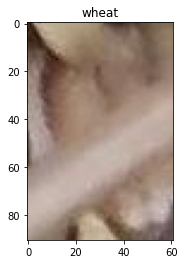

(91, 61, 3)


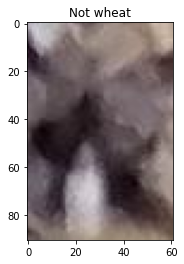

In [ ]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

class_name = "wheat"
i = random.randint(0, len(wheat_imgs))
print(i)

img = cv2.imread(wheat_imgs[i])
print(img.shape)
plt.title(class_name)
plt.imsave("{}.jpg".format(class_name), img[:,:,::-1])
plt.imshow(img[:,:,::-1])
plt.show()

img = cv2.imread(not_wheat_imgs[i])
print(img.shape)
plt.title("Not "+class_name)
plt.imshow(img[:,:,::-1])
plt.imsave("not_{}.jpg".format(class_name), img[:,:,::-1])
plt.show()

489
(100, 65, 3)


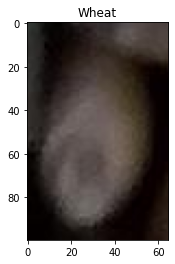

(100, 65, 3)


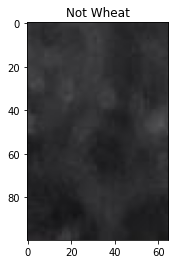

In [ ]:
i = random.randint(0, len(test_wheat_imgs))
print(i)

img = cv2.imread(test_wheat_imgs[i])
print(img.shape)
plt.imshow(img[:,:,::-1])
plt.title("Wheat")
plt.show()

img = cv2.imread(test_not_wheat_imgs[i])
print(img.shape)
plt.imshow(img[:,:,::-1])
plt.title("Not Wheat")
plt.show()

## Extracting HOG Features

In [ ]:
from imutils import paths
import argparse
import imutils

INPUT_HT = 60 #100
INPUT_WT = 60 #100
# define parameters of HOG feature extraction
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)
default_params = {'orientations': 9,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'transform_sqrt': True,
    'block_norm': "L2"}

#creating hog features 
def create_hog_features(img, params=default_params):
  orientations = params['orientations']
  pixels_per_cell = params['pixels_per_cell']
  cells_per_block = params['cells_per_block']
  transform_sqrt = params['transform_sqrt']
  block_norm = params['block_norm']
  # load the image, convert it to grayscale, and detect edges
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  edged = imutils.auto_canny(gray)
  resized_img = resize(img, (INPUT_HT,INPUT_WT)) 
  # resized_img = img 

  #creating hog features 
  fd, hog_image = hog(resized_img, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, block_norm=block_norm, feature_vector=True, visualize=True, transform_sqrt=transform_sqrt)# fd= feature descriptor
  return fd, hog_image, resized_img

def create_hog_features_for_images(img_faces, params=default_params):
    hog_faces = []
    resized_faces = []
    features = []
    for i in range(len(img_faces)):
        img = img_faces[i]
        #extracting hog features 
        fd, hog_image, resized_img = create_hog_features(img, params)

        # Rescale histogram for better display 
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 
        hog_faces.append(hog_image)
        resized_faces.append(resized_img)
        features.append(fd)
    return hog_faces, resized_faces, features



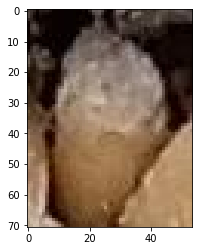

(71, 54, 3)


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


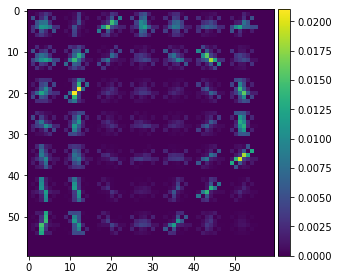

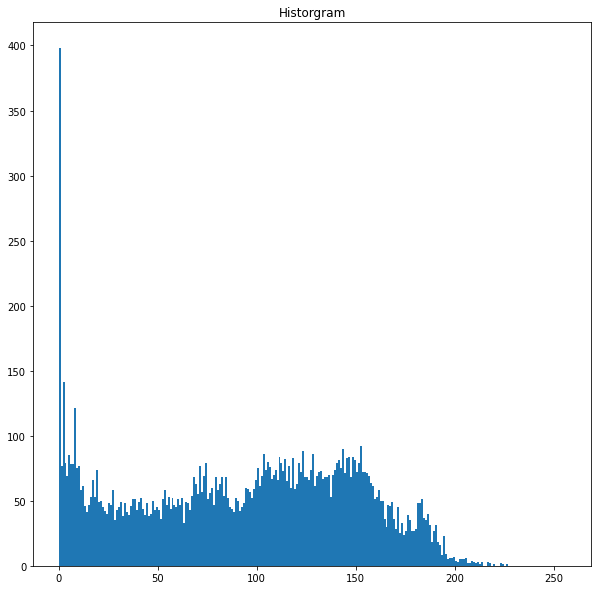

In [ ]:
from skimage.io import imread, imshow
i=0
img = cv2.imread(wheat_imgs[i])
plt.imshow(img[:,:,::-1])
plt.imsave("wheat_kernel.jpg",img[:,:,::-1])
plt.show()
print(img.shape)
_, hog_face1, _ = create_hog_features(img)
# Rescale histogram for better display 
hog_image_rescaled1 = exposure.rescale_intensity(hog_face1, in_range=(0, 10)) 
imshow(hog_image_rescaled1)
plt.imsave("wheat_kernel_hog.jpg",hog_image_rescaled1)
cv2.imwrite("wheat_kernel_hog2.jpg",hog_image_rescaled1)

plt.figure(figsize=(10,10))
plt.hist(img.ravel(),256,[0,256]);
plt.title("Historgram")
plt.savefig("Histogram.png", )
plt.show()



example to detect upright people in images using HOG features
Usage:
    peopledetect.py <image_names>
Press any key to continue, ESC to stop.

0 (0) found


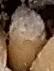

Done


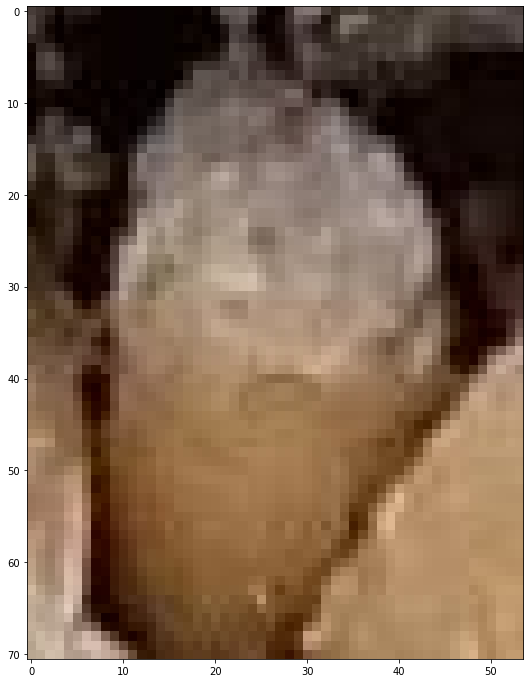

In [ ]:
#HOG Detector
'''
example to detect upright people in images using HOG features
Usage:
    peopledetect.py <image_names>
Press any key to continue, ESC to stop.
'''

# Python 2/3 compatibility
from __future__ import print_function

import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

def inside(r, q):
    rx, ry, rw, rh = r
    qx, qy, qw, qh = q
    return rx > qx and ry > qy and rx + rw < qx + qw and ry + rh < qy + qh


def draw_detections(img, rects, thickness = 1):
    for x, y, w, h in rects:
        # the HOG detector returns slightly larger rectangles than the real objects.
        # so we slightly shrink the rectangles to get a nicer output.
        pad_w, pad_h = int(0.15*w), int(0.05*h)
        cv2.rectangle(img, (x+pad_w, y+pad_h), (x+w-pad_w, y+h-pad_h), (0, 255, 0), thickness)
        cv2_imshow( img)

def main():
    import sys
    from glob import glob
    import itertools as it

    hog = cv2.HOGDescriptor()
    hog.setSVMDetector( cv2.HOGDescriptor_getDefaultPeopleDetector() )
    ''' the above code uses a pretrained SVM via HOG descriptors provided by the open cv database.
    This database is limited to the training it has performed hence cannot be used in any other angle other than perp. to the centroid
    Thus if you want to implement the HOG + SVM method, you'll have to train your own SVM with your own data'''

    # default = [cv2.samples.findFile('basketball2.png')] #if len(sys.argv[1:]) == 0 else []
    # print(default)
    # for fn in it.chain(*map(glob, default + sys.argv[1:])):
        # print(fn, ' - ',)
    img =  cv2.imread(wheat_imgs[0])

    # found, _w = hog.detectMultiScale(img, winStride=(8,8), padding=(32,32), scale=1.05)
    # found_filtered = []
    found, w = hog.detectMultiScale(img, winStride=(8,8), padding=(32,32), scale=1.05) # describing the parameters of HOG and returning them as a Human found function in 'found'
    found_filtered = [] #filtering the found human... to further improve visualisation (uses Gaussian filter for eradication of errors produced by luminescence.

    for ri, r in enumerate(found):
        for qi, q in enumerate(found):
            if ri != qi and inside(r, q):
                break
        else:
            found_filtered.append(r)
    draw_detections(img, found) # using the predefined bounding box to encapsulate the human detected within the bounding box.
    draw_detections(img, found_filtered, 3) # further filtering the box to improve visualisation.
    print('%d (%d) found' % (len(found_filtered), len(found))) # this will produce the output of the number of humans found in the actual command box)
    cv2_imshow(img) # finally showing the resulting image.

    # cv2_imshow( img)
    plt.figure(figsize=(10,12))
    plt.imshow(img[:,:,::-1])
    cv2.destroyAllWindows()
    # ch = cv2.waitKey()

    print('Done')


if __name__ == '__main__':
    print(__doc__)
    main()

In [ ]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from skimage import exposure
from skimage import feature
import cv2

# initialize the data matrix and labels

def train_images(params, training_images = wheat_imgs, classlabel="Wheat"):
	data = []
	labels = []
	# prepare_training_images
	# loop over the image paths in the training set
	print("Here: ", len(training_images))
	for  (i, image) in enumerate(training_images):
		# extract the celebrity from face
		celebrity = classlabel
		print("[INFO] extracting features... for image {}".format(i+1))
		# extract Histogram of Oriented Gradients from the face
		img =  cv2.imread(image)#[:,:,::-1]
		H, hog_face, _ = create_hog_features(img, params)
		hog_image_rescaled1 = exposure.rescale_intensity(hog_face, in_range=(0, 10))
		# imshow(hog_image_rescaled1)
		# print("Debug")
		# H = hog(logo, orientations=9, pixels_per_cell=(12, 12), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")
		# (H, hogImage) = hog(logo, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), transform_sqrt=True, block_norm="L1", visualize=True)
		# (H2, hogImage2) = hog(logo2, orientations=9, pixels_per_cell=(12, 12), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1", visualize=True)
		# imshow(image)
		
		# update the data and labels
		print(H.shape, hog_face.shape)
		data.append(H)
		labels.append(celebrity)
	return data, labels

def test_images(params, test_set = test_wheat_imgs, classlabel="Wheat"):
	resulted_imgs = []
	predictions = []
	test_data = []
	test_labels = []
	print(len(test_set))
	for (i, image) in enumerate(test_set):
		# load the test image, convert it to grayscale, and resize it to
		# the canonical size
		# image = cv2.imread(imagePath)
		# imshow(image)
		celebrity = classlabel
		print("[INFO] extracting features... for image {}".format(i+1))

		# extract Histogram of Oriented Gradients from the face
		img =  cv2.imread(image)
		H, hog_face, _ = create_hog_features(img, params)
	
		# extract Histogram of Oriented Gradients from the test image and
		# predict the make of the car
		# (H, hogImage) = hog(logo, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), transform_sqrt=True, block_norm="L1",  visualize=True)
		# (H, hogImage) = feature.hog(logo, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1", visualize=True)
		# pred = model.predict(H.reshape(1, -1))[0]
		test_data.append(H)
		test_labels.append(celebrity)
		# visualize the HOG image
		# hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
		# hogImage = hogImage.astype("uint8")
		# imshow("HOG Image #{}".format(i + 1), hogImage)
		# result_hog.append(hogImage)
		# draw the prediction on the test image and display it
		img2 = img.copy()
		# cv2.putText(img2, pred.title(), (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)
		# predictions.append(pred.title())
		# imshow("Test Image #{}".format(i + 1), image)
		resulted_imgs.append(img2)
	return test_data, test_labels#, resulted_imgs, predictions

params = {'orientations': 9, 'pixels_per_cell': (10, 10), 'cells_per_block': (2, 2), 'transform_sqrt':True, 'block_norm':'L2'}
# data, labels = train_images(params)

# print(len(data), data[0].shape)
# print(len(labels))


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
#importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

from time import time
import time
import logging
import matplotlib.pyplot as plt
import random
from random import randint

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_lfw_people
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
from skimage import data, color, feature
from skimage.transform import pyramid_gaussian
from sklearn.externals import joblib
from imutils.object_detection import non_max_suppression
import cv2
import os
import glob
# import json
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Some Helper methods and classes for the HOG pipeline to be used in Grid Search
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([rgb2gray(img) for img in X])
 
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys', transform_sqrt=True):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
        self.transform_sqrt = transform_sqrt
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm, transform_sqrt=self.transform_sqrt)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])


In [ ]:
from PIL import Image
import numpy as np

#Defining the HOG pipeline
HOG_pipeline = Pipeline([
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(8, 8),
        cells_per_block=(2,2),
        orientations=9,
        block_norm='L2-Hys',
        transform_sqrt= True)
    ),
    ('scalify', StandardScaler()),
    ('classify', KNeighborsClassifier(n_neighbors=1))
])

param_grid = [
    {'hogify__orientations': [9],
    'hogify__cells_per_block': [(2, 2), (3, 3)],
    'hogify__pixels_per_cell': [(8, 8), (14, 14)],
    'hogify__block_norm': ['L1','L2','L2-Hys', 'L1-sqrt'],
    'hogify__transform_sqrt': [True, False]},
]

training_images = []
labels = []
for img in wheat_imgs:
  img = cv2.imread(img)
  img = resize(img, (INPUT_HT,INPUT_WT)) 
  # plt.imshow(img)
  # plt.show()
  # im = np.array(Image.open(img), dtype='float64')
  training_images.append(img)
  labels.append(class_name)

for img in not_wheat_imgs:
  img = cv2.imread(img)
  img = resize(img, (INPUT_HT,INPUT_WT)) 
  # plt.imshow(img)
  # plt.show()
  # im = np.array(Image.open(img), dtype='float64')
  training_images.append(img)
  labels.append("not "+class_name)

# training_images = faces
print(len(training_images), labels)
# print(list(training_images))
print(len(labels))

grid_search = GridSearchCV(HOG_pipeline, param_grid, cv=3, n_jobs=-1, scoring='accuracy',verbose=1, return_train_score=True)
grid_res = grid_search.fit(list(training_images), labels)
# description of the best performing object, a pipeline in our case.

print(grid_res.best_estimator_)
print(grid_res.best_estimator_.steps)
# print('Train Score: ', model.score(data, labels))

In [ ]:
# the highscore during the search
import pprint
print(grid_res.best_score_)
pp = pprint.PrettyPrinter(width=41, compact=True)
pp.pprint(grid_res.best_params_)

0.9089467532885126
{'hogify__block_norm': 'L2-Hys',
 'hogify__cells_per_block': (3, 3),
 'hogify__orientations': 9,
 'hogify__pixels_per_cell': (14, 14),
 'hogify__transform_sqrt': True}


2118


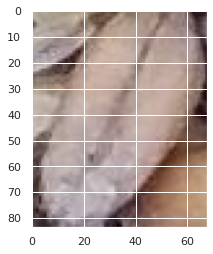

(84, 68, 3)


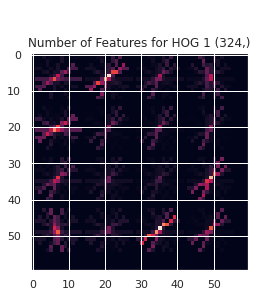

(324,) (60, 60)


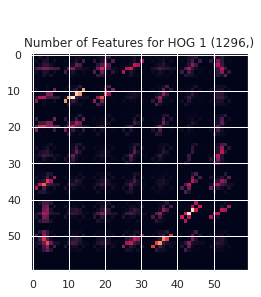

(1296,) (60, 60)


In [ ]:
from skimage.io import imread, imshow
# 60x60
block_norm='L2-Hys'
cells_per_block=(3, 3)
orientations=9
pixels_per_cell=(14, 14)
transform_sqrt=True

# 20x20 hog
# block_norm='L1-sqrt'
# cells_per_block=(2, 2)
# orientations=9
# pixels_per_cell=(8, 8)
# transform_sqrt=True

grid_params = {'orientations': orientations, 'pixels_per_cell': pixels_per_cell, 'cells_per_block': cells_per_block, 'transform_sqrt':transform_sqrt, 'block_norm':block_norm}
i = random.randint(0, len(wheat_imgs))
print(i)
img = cv2.imread(wheat_imgs[i])
plt.imshow(img[:,:,::-1])
plt.imsave("orig_img_{}.jpg".format(class_name), img[:,:,::-1])
plt.show()
print(img.shape)
h, hog_face1, _ = create_hog_features(img, grid_params)
# Rescale histogram for better display 
hog_image_rescaled1 = exposure.rescale_intensity(hog_face1, in_range=(0, 10)) 
plt.imshow(hog_image_rescaled1)
plt.title("\n\nNumber of Features for HOG 1 {}".format(h.shape))
plt.imsave("hog_img_{}.jpg".format(class_name), hog_image_rescaled1)
plt.show()
print(h.shape,hog_face1.shape )
h2, hog_face2, _ = create_hog_features(img)
# Rescale histogram for better display 
hog_image_rescaled2 = exposure.rescale_intensity(hog_face2, in_range=(0, 10)) 
plt.imshow(hog_image_rescaled2)
plt.title("\n\nNumber of Features for HOG 1 {}".format(h2.shape))
plt.show()
print(h2.shape, hog_face2.shape)


## Classification

In [ ]:
from skimage import data, color, feature
import skimage.data

image = color.rgb2gray(faces[0])
hog_vec, hog_vis = hog(image, visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

In [ ]:
# Helper method to plot the confusion matrix 
def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(6)) for a in ax]
    [a.set_yticks(range(6)) for a in ax]
 
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1)
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()


# One Class SVC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)

# params = {'orientations': 9, 'pixels_per_cell': (14, 14), 'cells_per_block': (2, 2), 'transform_sqrt':True, 'block_norm':'L2-Hys'}
params = grid_params
training_data, training_labels = train_images(params)
test_data, test_labels = test_images(params)
# X_train = np.r_[X + 2, X - 2]
X_train = training_data
print(len(X_train))
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
# X_test = np.r_[X + 2, X - 2]
X_test = test_data
print(len(X_test))
# # Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
print(len(X_outliers))
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
# y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size

print(y_pred_train)
print(y_pred_test)
# n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
# xx = np.array(X_train)
# yy = np.array(X_test)
# Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# plt.title("Novelty Detection")
# plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
# a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

# s = 40
# b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
# b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
#                  edgecolors='k')
# c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
#                 edgecolors='k')
# plt.axis('tight')
# plt.xlim((-5, 5))
# plt.ylim((-5, 5))
# plt.legend([a.collections[0], b1, b2, c],
#            ["learned frontier", "training observations",
#             "new regular observations", "new abnormal observations"],
#            loc="upper left",
#            prop=matplotlib.font_manager.FontProperties(size=11))
# plt.xlabel(
#     "error train: %d/200 ; errors novel regular: %d/40 ; "
#     "errors novel abnormal: %d/40"
#     % (n_error_train, n_error_test, n_error_outliers))
# plt.show()

Streaming output truncated to the last 5000 lines.
[INFO] extracting features... for image 299
(324,) (60, 60)
[INFO] extracting features... for image 300
(324,) (60, 60)
[INFO] extracting features... for image 301
(324,) (60, 60)
[INFO] extracting features... for image 302
(324,) (60, 60)
[INFO] extracting features... for image 303
(324,) (60, 60)
[INFO] extracting features... for image 304
(324,) (60, 60)
[INFO] extracting features... for image 305
(324,) (60, 60)
[INFO] extracting features... for image 306
(324,) (60, 60)
[INFO] extracting features... for image 307
(324,) (60, 60)
[INFO] extracting features... for image 308
(324,) (60, 60)
[INFO] extracting features... for image 309
(324,) (60, 60)
[INFO] extracting features... for image 310
(324,) (60, 60)
[INFO] extracting features... for image 311
(324,) (60, 60)
[INFO] extracting features... for image 312
(324,) (60, 60)
[INFO] extracting features... for image 313
(324,) (60, 60)
[INFO] extracting features... for image 314
(324,

In [ ]:
print(n_error_train, n_error_test)
print(len(X_train), len(X_test))
# print("Train Accuracy: "+str(accuracy_score(X_train, y_pred_train)))
# print("Test Accuracy: "+str(accuracy_score(X_test, y_pred_test)))
# print('\n')
# print(classification_report(X_test, y_pred_test))
# cmx_svm = confusion_matrix(X_test, y_pred_test)
# # plot_confusion_matrix(cmx_svm, vmax1=225, vmax2=100, vmax3=12)

260 49
2537 495


# 2 Class SVM

In [ ]:
import time
start_time = time.process_time()
clf = svm.SVC()
# params = {'orientations': 9, 'pixels_per_cell': (14, 14), 'cells_per_block': (2, 2), 'transform_sqrt':True, 'block_norm':'L2-Hys'}
# HogTransformer(block_norm='L1-sqrt', cells_per_block=(3, 3),
#                                 orientations=9, pixels_per_cell=(14, 14),
#                                 transform_sqrt=True, y=None)),


training_data, training_labels = train_images(grid_params,wheat_imgs,class_name)
training_datanw, training_labelsnw = train_images(grid_params, not_wheat_imgs,"not "+class_name)
training_data = training_data+training_datanw
training_labels = training_labels+training_labelsnw
print("Total Training Data: ", len(training_data), len(training_labels))
clf.fit(training_data,training_labels)
elapsed_time = time.process_time() - start_time
print("Training Time: ",elapsed_time, " seconds")
# test_set = faces[20:30]+faces[50:60]
# hog_faces, resulted_imgs, test_data = create_hog_features_for_images(test_set, params) 
# y_pred = clf.predict(test_data)
y_pred = clf.predict(training_data)
print(y_pred)
y_test = training_labels
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))
cmx_svm = confusion_matrix(y_test, y_pred)
# plot_confusion_matrix(cmx_svm, vmax1=225, vmax2=100, vmax3=12)

In [ ]:
print("Total Training Data: ", len(training_data), len(training_labels))
# clf = svm.SVC()
# params = {'orientations': 9, 'pixels_per_cell': (14, 14), 'cells_per_block': (2, 2), 'transform_sqrt':True, 'block_norm':'L2-Hys'}

test_data, test_labels = test_images(grid_params, test_wheat_imgs, class_name)
test_datanw, test_labelsnw = test_images(grid_params, test_not_wheat_imgs, "not "+class_name)
test_data = test_data+test_datanw
test_labels = test_labels+test_labelsnw
print("Total Test Data: ", len(test_data), len(test_labels))
y_pred = clf.predict(test_data)
# print(y_pred)
print("Accuracy: "+str(accuracy_score(test_labels, y_pred)))
print('\n')
print(classification_report(test_labels, y_pred))
# cmx_svm = confusion_matrix(test_labels, y_pred)
# plot_confusion_matrix(cmx_svm, vmax1=225, vmax2=100, vmax3=12)

[INFO] extracting features... for image 354
[INFO] extracting features... for image 355
[INFO] extracting features... for image 356
[INFO] extracting features... for image 357
[INFO] extracting features... for image 358
[INFO] extracting features... for image 359
[INFO] extracting features... for image 360
[INFO] extracting features... for image 361
[INFO] extracting features... for image 362
[INFO] extracting features... for image 363
[INFO] extracting features... for image 364
[INFO] extracting features... for image 365
[INFO] extracting features... for image 366
[INFO] extracting features... for image 367
[INFO] extracting features... for image 368
[INFO] extracting features... for image 369
[INFO] extracting features... for image 370
[INFO] extracting features... for image 371
[INFO] extracting features... for image 372
[INFO] extracting features... for image 373
[INFO] extracting features... for image 374
[INFO] extracting features... for image 375
[INFO] extracting features... fo

In [ ]:
start_time = time.process_time()
grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(training_data,training_labels)
grid.best_score_
elapsed_time = time.process_time() - start_time
print("Training Time using Grid Search: ",elapsed_time, " seconds")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training Time using Grid Search:  14.91709356299998  seconds


In [ ]:
grid.best_params_

{'C': 2.0}

In [ ]:
start_time = time.process_time()
model_svm = grid.best_estimator_
model_svm.fit(training_data,training_labels)
elapsed_time = time.process_time() - start_time
print("Training Time: ",elapsed_time, " seconds")

Training Time:  0.4579784430000018  seconds


In [ ]:
y_pred = model_svm.predict(training_data)
print(y_pred)
y_test = training_labels
print("Training Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')

['wheat' 'wheat' 'wheat' ... 'not wheat' 'not wheat' 'not wheat']
Training Accuracy: 0.9456050453291289




In [ ]:
y_pred = clf.predict(test_data)
print("Test Accuracy: "+str(accuracy_score(test_labels, y_pred)))
print('\n')
print(classification_report(test_labels, y_pred))
# cmx_svm = confusion_matrix(test_labels, y_pred)
# plot_confusion_matrix(cmx_svm, vmax1=225, vmax2=100, vmax3=12)

Test Accuracy: 0.9656565656565657


              precision    recall  f1-score   support

   not wheat       0.97      0.97      0.97       495
       wheat       0.97      0.97      0.97       495

    accuracy                           0.97       990
   macro avg       0.97      0.97      0.97       990
weighted avg       0.97      0.97      0.97       990



In [ ]:
test_image = cv2.imread('/content/0c530cf4-0000000.jpg')
# test_image = cv2.imread('/content/66c5db93-0000000.jpg')
# test_image = cv2.imread('/content/res2_magic3.jpg')
# test_image = cv2.imread('/content/im2.jpeg')
output_img = "/content/wheat-detections.jpg"
img_name = "0c530cf4-0000000.jpg"
test_dir = '/content/'

In [ ]:
def calculate_aspect(width: int, height: int) -> str:
    temp = 0

    def gcd(a, b):
        """The GCD (greatest common divisor) is the highest number that evenly divides both width and height."""
        return a if b == 0 else gcd(b, a % b)

    if width == height:
        return "1:1"

    if width < height:
        temp = width
        width = height
        height = temp

    divisor = gcd(width, height)

    x = int(width / divisor) if not temp else int(height / divisor)
    y = int(height / divisor) if not temp else int(width / divisor)

    return f"{x}:{y}"

In [ ]:
threshold = .65

def create(file):
    f = open(file,'a')
    return f

# define the sliding window:
def sliding_window(image, stepSize, windowSize):# image is the input, step size is the no.of pixels needed to skip and windowSize is the size of the actual window
    # slide a window across the image
    for y in range(0, image.shape[0], stepSize):# this line and the line below actually defines the sliding part and loops over the x and y coordinates
        for x in range(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[y: y + windowSize[1], x:x + windowSize[0]])

# read the image you want to detect the object in:
img= test_image

# defining the size of the sliding window (has to be, same as the size of the image in the training data)
# (winW, winH)= (200,100)
(winW, winH)= (INPUT_HT,INPUT_WT)
windowSize=(winW,winH)
downscale=1.5
# params = {'orientations': 9, 'pixels_per_cell': (14, 14), 'cells_per_block': (2, 2), 'transform_sqrt':True, 'block_norm':'L2-Hys'}
params = grid_params
orientations = params['orientations']
pixels_per_cell = params['pixels_per_cell']
cells_per_block = params['cells_per_block']
transform_sqrt = params['transform_sqrt']
block_norm = params['block_norm']
RESCALE_INPUT_HT = 1000
RESCALE_INPUT_WT = 1000

def predict_using_sliding_window(img):
  # Try it with image resized if the image is too big
  img= cv2.resize(img,(RESCALE_INPUT_HT,RESCALE_INPUT_WT)) # can change the size to default by commenting this code out our put in a random number
  orig = img.copy()

  # Test the trained classifier on an image below!
  scale = 0
  detections = []
  slides = []
  slide_hogs = []
  # Apply sliding window:
  for resized in pyramid_gaussian(img, downscale=1.5): # loop over each layer of the image that you take!
      # loop over the sliding window for each layer of the pyramid
      for (x,y,window) in sliding_window(resized, stepSize=10, windowSize=(winW,winH)):
          # if the window does not meet our desired window size, ignore it!
          print(window.shape, winW,winH)
          if window.shape[0] != winH or window.shape[1] !=winW: # ensure the sliding window has met the minimum size requirement
              continue
        
          #creating hog features 
          # cv2_imshow(window)
          window = resize(window, (INPUT_HT,INPUT_WT)) 
          slides.append(window)
          # window = np.array(window, dtype=np.uint8)
          # gray = cv2.cvtColor(window, cv2.COLOR_RGB2BGR)
          # fds, hog_image, _ = create_hog_features(window, params)
          fds, hog_image = hog(window, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, block_norm=block_norm, feature_vector=True, visualize=True, transform_sqrt=transform_sqrt)# fd= feature descriptor
          fds = fds.reshape(1, -1) # re shape the image to make a silouhette of hog
          pred = model_svm.predict(fds) # use the SVM model to make a prediction on the HOG features extracted from the window
          print(pred, pred == "wheat")
          slide_hogs.append(hog_image)
          if pred == "wheat":
              if model_svm.decision_function(fds) > threshold:  # set a threshold value for the SVM prediction i.e. only firm the predictions above probability of 0.6
                  print("Detection:: Location -> ({}, {})".format(x, y))
                  print("Scale ->  {} | Confidence Score {} \n".format(scale,model_svm.decision_function(fds)))
                  detections.append((int(x * (downscale**scale)), int(y * (downscale**scale)), model_svm.decision_function(fds),
                                    int(windowSize[0]*(downscale**scale)), # create a list of all the predictions found
                                        int(windowSize[1]*(downscale**scale))))
      scale+=1
      
  clone = resized.copy()
  print(len(detections), detections)
  for (x_tl, y_tl, _, w, h) in detections:
      # w = 30
      # h = 30
      print("x_tl {} y_tl {} w {} h: {}".format(x_tl, y_tl,w, h))
      cv2.rectangle(img, (x_tl, y_tl), (x_tl + w, y_tl + h), (0, 0, 255), thickness = 2)
  rects = np.array([[x, y, x + w, y + h] for (x, y, _, w, h) in detections]) # do nms on the detected bounding boxes
  sc = [score[0] for (x, y, score, w, h) in detections]
  print("detection confidence score: ", sc)
  sc = np.array(sc)
  pick = non_max_suppression(rects, probs = sc, overlapThresh = 0.5)

 # this creates a raw bounding box before using NMS
  nms_score = []
  for (xA, yA, xB, yB) in (pick):
    for i, [xA2, yA2, xB2, yB2] in enumerate(rects):
      if ([xA, yA, xB, yB] ==  [xA2, yA2, xB2, yB2]):
        nms_score.append(sc[i])
 
  # this creates a bounding box after using nms on the detections.
  font = cv2.FONT_HERSHEY_SIMPLEX   # font 
  fontScale = 0.45   # fontScale 
  color = (255, 0, 0)  # Blue color in BGR 
  thickness = 1 # Line thickness of 1 px 
  print("Raw Detections after NMS")
  i = 0
  filname = img_name.replace('.jpg', '.txt')
  f_path = test_dir + filname
  f = create(f_path)
  # f.write("\n\n")
  copy2 = orig.copy()
  for (xA, yA, xB, yB) in pick:
      w = xB-xA
      h = yB-yA
      xB = xA+45
      yB = yA+44
      limit = 100
      aspect_ratio = calculate_aspect(int(w), int(h))
      print("BBoxes: ",xA,yA, xB, yB, w, h)
      # color1 = (list(np.random.choice(range(256), size=3)))  
      # multi_color =[int(color1[0]), int(color1[1]), int(color1[2])]  
      # mutated_anchors = []
      if w <= limit and h <= limit:
        class_name = "wheat"
        confidence = round(nms_score[i],2)
        prob_score = "wheat {}".format(round(nms_score[i],2))
        # for (w1, h1) in anchors:
        #   # print(calculate_aspect(w, h))
        #   mutated_anchors.append([xA + w1, yA+h1]) 
        #   newX = xA + w1
        #   newY =  yA+h1
        #   copy2 = cv2.putText(multi_color, prob_score, (xA+5,yA-5), font, fontScale, color, thickness, cv2.LINE_AA) 
        #   cv2.rectangle(copy2, (xA, yA), (newX, newY), color, 2)
        # orig = cv2.putText(orig, prob_score, (xA+5,yA-5), font, fontScale, color, thickness, cv2.LINE_AA) 
        cv2.rectangle(orig, (xA, yA), (xB, yB), (0,255,0), 2)
        class_name = "wheat"
        confidence = round(nms_score[i],2)
        # f.write("{} {} {} {} {} {} size:{} x {} aspect_ratio: {} mutated_anchors: {}\n".format(class_name,confidence,xA , yA, xB , yB, w, h, aspect_ratio, mutated_anchors))
        f.write("{} {} {} {} {} {}\n".format(class_name,confidence,xA , yA, xB , yB))
      i +=1

  f.close() 
  imshow(orig)
  plt.title("wheat")
  plt.imsave(output_img, orig[:,:,::-1]) 
  # plt.imsave("/content/copy.jpg", copy2[:,:,::-1]) 
  plt.imshow(orig[:,:,::-1])
  plt.show()
  return orig, slides, slide_hogs

Streaming output truncated to the last 5000 lines.
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat'] [False]
(60, 60, 2) 60 60
['not wheat

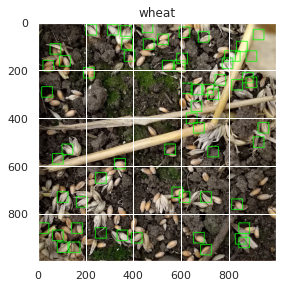

Detection Time:  329.49134555800003  seconds


In [ ]:
start_time = time.process_time()
_, slides, slide_hogs = predict_using_sliding_window(test_image)
elapsed_time = time.process_time() - start_time
print("Detection Time: ",elapsed_time, " seconds")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15112 15112
15112


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

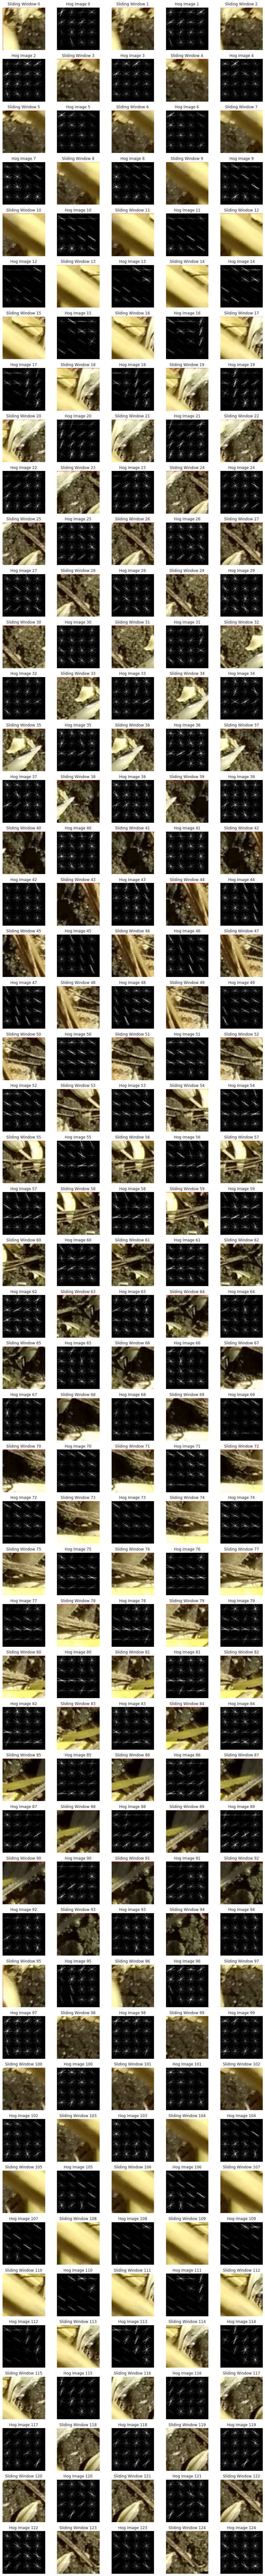

In [ ]:
# Helper method to plot the sliding windows and its corresponding HOG images
def plot_sliding_windows(slides, slide_hogs):
  n_row=50
  n_col=5
  j = 0
  h = 100
  w = 100
  print(len(slides))
  plt.figure(figsize=(1.5 * n_col * 2, 1.5 * n_row * 2))
  for i in range(0, n_row * n_col, 2):
      if (j < len(slides)):
        # show input image
        plt.subplot(n_row, n_col, i + 1)
        image = cv2.resize(slides[j], (h, w))
        plt.imshow(image[:,:,::-1])
        plt.title("Sliding Window {}".format(j), size=12)
        plt.xticks(())
        plt.yticks(())

        # show corresponding hog image
        plt.subplot(n_row, n_col, i + 2)
        plt.imshow(cv2.resize(slide_hogs[j], (h, w)), cmap=plt.cm.gray)
        plt.title("Hog Image {}".format(j), size=12)
        plt.xticks(())
        plt.yticks(())
        j+=1

  plt.savefig('sliding_windows_wheat.png')
print(len(slides), len(slide_hogs))
plot_sliding_windows(slides, slide_hogs)

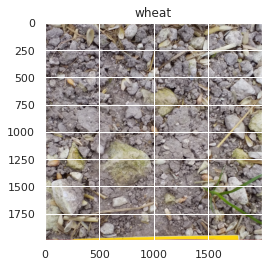

In [ ]:
plt.title("wheat")
plt.imshow(img[:,:,::-1])
plt.show()

In [ ]:
ss = []
ss2 = []
img= cv2.resize(test_image,(1000,1000))
(winW, winH)= (60,60)
windowSize=(winW,winH)

i = 0
for resized in pyramid_gaussian(img, downscale=2.2):
    print(resized.shape)
    # plt.imshow(resized, cmap='gray')
    # plt.show()
    for (x,y,window) in sliding_window(resized, stepSize=10, windowSize=(winW,winH)):
        # if the window does not meet our desired window size, ignore it!
        if window.shape[0] != winH or window.shape[1] !=winW: # ensure the sliding window has met the minimum size requirement
            continue
        if i < 50:
          ss.append(window)
          ss2.append(resized)
          i += 1

plot_sliding_windows(ss, ss2)

In [ ]:
# test_set = faces[20:30]+faces[50:60]+faces[60:70]+faces[70:80]
# hog_faces, resulted_imgs, test_data = create_hog_features_for_images(test_set, params) 
# y_pred = model_svm.predict(test_data)
# print(y_pred)
# print("Accuracy: "+str(accuracy_score(y_test_all, y_pred)))
# print('\n')
# print(classification_report(y_test_all, y_pred, target_names=target_names))
# cmx_svm = confusion_matrix(y_test_all, y_pred)
# plot_confusion_matrix(cmx_svm, vmax1=225, vmax2=100, vmax3=12)
dttb = [[51, 87], [54, 65], [62, 109], [65, 91], [72, 61], [74, 75], [86, 96], [92, 60], [98, 75]]
#  [51,77, 54,55, 62,99, 65,81, 72,51, 74,65, 86,86, 92,50, 98,65]
for db, yt in dttb:
  print(db,yt, calculate_aspect(db, yt), db/yt)
  print(calculate_aspect(60, 60), 60/60)
# min()

51 87 17:29 0.5862068965517241
1:1 1.0
54 65 54:65 0.8307692307692308
1:1 1.0
62 109 62:109 0.5688073394495413
1:1 1.0
65 91 5:7 0.7142857142857143
1:1 1.0
72 61 72:61 1.180327868852459
1:1 1.0
74 75 74:75 0.9866666666666667
1:1 1.0
86 96 43:48 0.8958333333333334
1:1 1.0
92 60 23:15 1.5333333333333334
1:1 1.0
98 75 98:75 1.3066666666666666
1:1 1.0


In [ ]:
# fig, ax = plt.subplots(4, 10, figsize=(14, 8))
# print("Classification Results using SVM")
# j = 0
# for i, axi in enumerate(ax.flat):
#     img = cv2.resize(resulted_imgs[j], (100,100))
#     axi.imshow(img, cmap='gray')
#     axi.set_title("\nPredicted: {}\nActual: {}".format(y_pred[j], y_test_all[j]))
#     axi.axis('off')
#     j += 1
# color = tuple(np.random.randint(256, size=3)) 
color1 = (list(np.random.choice(range(256), size=3)))  
color =[int(color1[0]), int(color1[1]), int(color1[2])]  
print(color)
test_copy = test_image.copy()
x1 = 9
y1=7

cv2.circle(test_copy, (x1,y1), 2,color,2)  

[60, 196, 14]


array([[[ 24,  24, 192],
        [ 31,  35, 184],
        [ 31,  44, 154],
        ...,
        [ 25,  29, 178],
        [ 20,  22, 207],
        [ 22,  22, 224]],

       [[ 35,  36, 186],
        [171, 177, 255],
        [190, 206, 255],
        ...,
        [  0,   0, 125],
        [  0,   0, 161],
        [ 10,  12, 196]],

       [[ 27,  36, 147],
        [197, 211, 255],
        [203, 226, 255],
        ...,
        [  0,   3,  87],
        [  0,   1, 130],
        [ 26,  30, 179]],

       ...,

       [[ 37,  39, 177],
        [  0,   0, 111],
        [  0,   0,  70],
        ...,
        [ 14,  31, 112],
        [  4,  13, 140],
        [ 23,  29, 178]],

       [[ 12,  13, 195],
        [  0,   0, 147],
        [  0,   0, 116],
        ...,
        [ 12,  27, 149],
        [  0,  10, 168],
        [ 17,  22, 201]],

       [[ 26,  27, 231],
        [ 18,  20, 204],
        [ 37,  37, 183],
        ...,
        [ 16,  33, 173],
        [  7,  15, 192],
        [ 16,  23, 216]]

In [ ]:
anchors = [51,77, 54,55, 62,99, 65,81, 72,51, 74,65, 86,86, 92,50, 98,65]
anchors = np.array(anchors).reshape(-1, 2)
print(anchors)
for (w, h) in anchors:
  print(calculate_aspect(w, h))

[[51 77]
 [54 55]
 [62 99]
 [65 81]
 [72 51]
 [74 65]
 [86 86]
 [92 50]
 [98 65]]
51:77
54:55
62:99
65:81
24:17
74:65
1:1
46:25
98:65


In [ ]:
import glob
# !ls '/content/gdrive/My Drive/CNHIinternship/logs_HOG'
files = glob.glob('/content/gdrive/My Drive/CNHIinternship/logs_HOG'+"/*.jpg")
print(len(files),files)

prev_dir = "/content/dataset/test_set/"
files2 = glob.glob(prev_dir+"/*.jpg")
print(len(files2),files2)

files3 = []
for f in files2:
  img = f.split("/").pop()
  # print(img)
  # for f2 in files2:
  dir = '/content/gdrive/My Drive/CNHIinternship/logs_HOG/'
  if (dir+img not in files):
    files3.append(f)

print(len(files3),files3)

122 ['/content/gdrive/My Drive/CNHIinternship/logs_HOG/08420780-0000000.jpg', '/content/gdrive/My Drive/CNHIinternship/logs_HOG/bce1d10b-0000000.jpg', '/content/gdrive/My Drive/CNHIinternship/logs_HOG/81c01618-0000000.jpg', '/content/gdrive/My Drive/CNHIinternship/logs_HOG/d2f8a97b-0000000.jpg', '/content/gdrive/My Drive/CNHIinternship/logs_HOG/305b30fc-0000000.jpg', '/content/gdrive/My Drive/CNHIinternship/logs_HOG/6dccbdbf-0000000.jpg', '/content/gdrive/My Drive/CNHIinternship/logs_HOG/b5e21e5b-0000000.jpg', '/content/gdrive/My Drive/CNHIinternship/logs_HOG/d8885d73-0000000.jpg', '/content/gdrive/My Drive/CNHIinternship/logs_HOG/209a6fd6-0000000.jpg', '/content/gdrive/My Drive/CNHIinternship/logs_HOG/98c0afb0-0000000.jpg', '/content/gdrive/My Drive/CNHIinternship/logs_HOG/83d2da07-0000000.jpg', '/content/gdrive/My Drive/CNHIinternship/logs_HOG/43348926-0000000.jpg', '/content/gdrive/My Drive/CNHIinternship/logs_HOG/2523348f-0000000.jpg', '/content/gdrive/My Drive/CNHIinternship/logs_

# Prediction

In [ ]:
prev_dir = "/content/dataset/test_set/"
files = glob.glob(prev_dir+"/*.jpg")
print(files)
test_dir = '/content/gdrive/My Drive/CNHIinternship/logs_HOG/'
test_dir = test_dir
if not os.path.isdir(test_dir):
  os.makedirs(test_dir)

test_image = cv2.imread('/content/dataset/training_set/66c5db93-0000000.jpg')
output_img = "/content/wheat-detections.jpg"
img_name = "66c5db93-0000000.jpg"

os.chdir("/content/")
start_time2 = time.process_time()

for f in files3:
  test_image = cv2.imread(f)
  data = f.strip().split(" ")
  img_name = data[0].split("/").pop()
  output_img = test_dir + img_name
  start_time = time.process_time()
  _, slides, slide_hogs = predict_using_sliding_window(test_image)
  elapsed_time = time.process_time() - start_time
  print("Detection Time: ",elapsed_time, " seconds")

elapsed_time2 = time.process_time() - start_time2
if (len(files) > 0):
  print("Avg Detection Time: ",elapsed_time2/len(files), " seconds")

In [ ]:
n_row=8
n_col=6
j = 0
h = 500
w = 500
plt.figure(figsize=(2.5 * n_col * 2, 2.5 * n_row * 2))
for i in range(0, n_row * n_col, 2):
    # show input image
    if j < len(predicted_imgs):
      plt.subplot(n_row, n_col, i + 1)
      plt.imshow(cv2.resize(predicted_imgs[j], (h, w)), cmap=plt.cm.gray)
      plt.title("Mutated Tilda Image {}".format(j+1), size=12)
      plt.xticks(())
      plt.yticks(())
      j+=1

# Generate Ground Truths for No Tiles

In [ ]:
import cv2

# test_file = "/content/dataset/test_annotations.txt"
# test_file = file_name.split(".")[0]+"_rescaled.txt"
# test_file = file_name_normalised
test_file = "/content/dataset/validation_rescaled_annotations_normalised.txt"
dataType="test"
final_imgs = "dataset/".format(dataType)
main_dir = "/content/gdrive/My Drive/CNHIinternship/"
gt_dir = main_dir+'test_txt_ground_truths_notiles_hog_val/'


def read_img_paths_gt(file, labeldirectory, dataType):
    with open(file) as fp:
        fp.seek(0, 0)
        line = fp.readline()
        i = 0
        while line:
          i += 1
          data = line.strip().split(" ")
          imgName = data[0].split("/").pop().replace('.jpg', '.txt')
          print(imgName)
          if True:#(imgName in files2):
            print(imgName)
            f = open(labeldirectory+imgName,"a")
            for boxes in data[1:]:
                box_str = "wheat"
                box_info = boxes.split(',')
                x1 = int(box_info[0])
                y1 = int(box_info[1])
                x2 = int(box_info[2])
                y2 = int(box_info[3])
                box_str += " " + (' ').join(box_info[:-1])
    #             image_paths.append(origDirectory+line.strip())
                print(box_str)
                f.write(box_str+"\n")
            # if i == 2:
            #   print(line)
            #   img = draw_ground_truths(line)
            #   cv2.imwrite("/content/test-gt.jpg", img)
          line = fp.readline()
        
read_img_paths_gt(test_file, gt_dir, "validation")
# print(imagePaths[1], len(imagePaths))

0be79c41-0000000.txt
0be79c41-0000000.txt
wheat 298 227 319 275
wheat 959 420 997 450
wheat 432 437 476 475
wheat 209 937 232 979
wheat 356 962 380 996
wheat 697 955 721 998
85ea2055-0000000.txt
85ea2055-0000000.txt
wheat 685 705 714 737
wheat 474 364 520 408
wheat 435 413 461 459
wheat 339 509 372 537
wheat 0 129 43 157
wheat 824 482 870 514
wheat 813 503 857 527
wheat 977 533 999 547
b2775041-0000000.txt
b2775041-0000000.txt
wheat 77 867 110 901
wheat 419 795 439 816
wheat 424 777 466 802
wheat 481 648 517 693
wheat 550 700 581 736
wheat 648 741 671 778
wheat 694 769 718 814
wheat 902 796 936 839
wheat 934 804 964 835
wheat 704 627 745 661
wheat 51 150 84 198
wheat 129 21 164 43
wheat 819 379 847 431
wheat 887 305 937 334
wheat 724 341 778 364
wheat 281 434 314 459
wheat 362 439 388 490
wheat 422 422 450 471
wheat 494 340 530 391
wheat 550 373 581 407
wheat 542 485 568 529
wheat 275 594 325 621
358e5e92-0000000.txt
358e5e92-0000000.txt
wheat 891 638 920 691
wheat 825 551 853 597
whea

### Draw GT + DT

/content/0c530cf4-0000000.jpg
/content/0c530cf4-0000000.jpg /content/gdrive/My Drive/CNHIinternship/test_txt_ground_truths_notiles_hog_val/0c530cf4-0000000.txt
1 wheat 977 768 1000 795

1 ['wheat', '977', '768', '1000', '795']
gt ['977', '768', '1000', '795']
2 wheat 959 777 997 822

2 ['wheat', '959', '777', '997', '822']
gt ['959', '777', '997', '822']
3 wheat 905 853 930 902

3 ['wheat', '905', '853', '930', '902']
gt ['905', '853', '930', '902']
4 wheat 864 856 905 885

4 ['wheat', '864', '856', '905', '885']
gt ['864', '856', '905', '885']
5 wheat 823 748 856 786

5 ['wheat', '823', '748', '856', '786']
gt ['823', '748', '856', '786']
6 wheat 724 724 770 761

6 ['wheat', '724', '724', '770', '761']
gt ['724', '724', '770', '761']
7 wheat 655 893 705 926

7 ['wheat', '655', '893', '705', '926']
gt ['655', '893', '705', '926']
8 wheat 916 721 972 742

8 ['wheat', '916', '721', '972', '742']
gt ['916', '721', '972', '742']
9 wheat 887 694 931 724

9 ['wheat', '887', '694', '931', '72

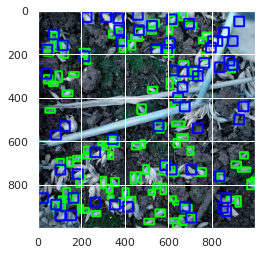

Data is successfully detected.


In [ ]:
import sys
import os
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as pyplot #change all variable names
import numpy as np
import cv2
import random
%matplotlib inline

def draw_outputs(img, box_info, box_type):
    # boxes, objectness, classes, nums = outputs
    # boxes, objectness, classes, nums = boxes[0], objectness[0], classes[0], nums[0]
    # wh = np.flip(img.shape[0:2])
    # box_info = []
    print(box_type, box_info)
    color = (0, 0, 255)
    if (box_type == "gt"):
        color = (0, 255, 0)
    # for boxes in box_info:
        # box_info = boxes.split(',')
    x = int(box_info[0])
    y = int(box_info[1])
    w = int(box_info[2])
    h = int(box_info[3])
    img = cv2.rectangle(img, (x,y), (w,h), color, 8)
        # img = cv2.putText(img, '{} {:.4f}'.format(
        #     box["class_name"], 1),
        #     (x1,y1), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 2)
    return img

class_type = "wheat"
data_type="test"
# file_name = "{}{}_annotations_normalised.txt".format(main_dir, data_type)
# file_name = "{}{}_annotations.txt".format(main_dir, data_type)
cropped_path = "/home/sania/Documents/KULeuven/internship/CNHi%20Grain%20Loss%20App/common/dataPreProcessing/scripts/PythonFiles/cropped_images/new_data/{}_set/".format(data_type)
data_path = gt_dir
# detections_path =  main_dir+"grains-output/{}".format(data_type)
detections_path =  "/content"
final_detctions_path = "/content/".format(data_type)
# out_path = "/content/gdrive/My Drive/CNHIinternship/logs_HOG".format(data_type)
out_path = "/content"
# def draw_ground_truths(line):
#      data = line.strip()
#      img_name = os.path.join(main_dir+'logs_HOG/',data)
#      image = cv2.imread(img_name)
#      file_data = os.path.join(data_path,data.replace(".jpg",".txt")) 
#      print(img_name, file_data)
#      with open(file_data) as file_pointer:
#        i = 1
#        file_pointer.seek(0, 0)
#        line = file_pointer.readline()
#        while line:
#          data = line.strip().split(" ")
#          print(data)
#          box_info =  data[1:]
#          new_img = draw_outputs(image,box_info,"dt")
#          line = file_pointer.readline()
#          i += 1
#      return new_img
#         # cv2.imshow("img", new_img)
#         # cv2.waitKey(1000)
#      # line = file_pointer.readline()
#      # i += 1

def draw_ground_truths(line):
     data = line.strip()
     img_name = os.path.join(out_path,data)
     print(img_name)
     image = cv2.imread(img_name)
     image = cv2.resize(image, (1000, 1000))
     file_data = os.path.join(data_path,data.replace(".jpg",".txt")) 
     print(img_name, file_data)
     with open(file_data) as file_pointer:
       i = 1
       file_pointer.seek(0, 0)
       line = file_pointer.readline()
       while line:
         print(i, line)
         data = line.strip().split(" ")
         print(i, data)
         box_info =  data[1:]
         image = draw_outputs(image,box_info,"gt")
         line = file_pointer.readline()
         i += 1
     print("\n\n\nTotal number of gt images:",i-1)
     return image
        # cv2.imshow("img", new_img)
        # cv2.waitKey(1000)
     # line = file_pointer.readline()
     # i += 1

def draw_detections(line, image):
     data = line.strip()
    #  img_name = os.path.join(out_path,data)
    #  print(img_name)
    #  image = cv2.imread(img_name)
     file_data = os.path.join(detections_path,data.replace(".jpg",".txt")) 
     with open(file_data) as file_pointer:
       i = 1
       file_pointer.seek(0, 0)
       line = file_pointer.readline()
       while line:
         print("dt",i, line)
         data = line.strip().split(" ")
         print(i, data)
         box_info =  data[2:]
         print(box_info)
         image = draw_outputs(image,box_info,"dt")
         line = file_pointer.readline()
         i += 1
     print("\n\n\nTotal number of dt images:",i-1)
     return image
        # cv2.imshow("img", new_img)
        # cv2.waitKey(1000)
     # line = file_pointer.readline()
     # i += 1


def draw_detections_old(line, image):
    # with open(file_name) as file_pointer:
       # i = 1
       # file_pointer.seek(0, 0)
       # line = file_pointer.readline()
       # while line:
         # img_name = line.strip()
         # img_name = cropped_path+line.strip()
         # image = cv2.imread(img_name)
     file_data = os.path.join(detections_path,line.strip().replace(".jpg",".txt")) 
     # print(img_name)
     print(file_data)
     with open(file_data) as fp:
        fp.seek(0, 0)
        line2 = fp.readline()
        box_info = []
        print(line2)
        while line2:
            data = line2.strip().split(" ")
            x1 = int(data[2]) #int((int(data[2]) / dt_img_size) * gt_img_size)
            y1 = int(data[3]) #int((int(data[3]) / dt_img_size) * gt_img_size)
            x2 = int(data[4]) #int((int(data[4]) / dt_img_size) * gt_img_size)
            y2 = int(data[5]) #int((int(data[5]) / dt_img_size) * gt_img_size)
            obj = {"class_name": data[0], "x1": x1,"y1": y1,"x2": x2,"y2": y2}
            box_info.append(obj)
            line2 = fp.readline()
        new_img = draw_outputs(image,box_info,"dt")
        return new_img
            # cv2.imshow("img", new_img)
            # cv2.waitKey(1000)
         # line = file_pointer.readline()
         # i += 1


def draw_boxes():
    with open(file_name) as file_pointer:
       i = 1
       file_pointer.seek(0, 0)
       line = file_pointer.readline()
       j = random.randint(0, 747)
       while line:
            if i == j:
              img = draw_ground_truths(line)
              data = line.strip().split(" ")
              img_name = data[0].split("/").pop()
              img_name = final_detctions_path+img_name
              print(img_name)
              cv2.imwrite(img_name, img)
            line = file_pointer.readline()
            i += 1
    print("Data is successfully detected.")

# draw_boxes()

def draw_boxes_1_img(line):
	img = draw_ground_truths(line)
	img = draw_detections(line, img)
	name = "/content/test_label_new_{}".format(line)
	print(name)
	cv2.imwrite(name, img)
	pyplot.imshow(img)
	pyplot.show()
	print("Data is successfully detected.")


# lin = "6aaf87b6-0000000.jpg"
# lin = "8cc0dcdd-0000000.jpg"
# lin ="12e673e9-0000000.jpg"
# lin="f9b54322-0000000.jpg"
# wheat
lin = "0c530cf4-0000000.jpg"
# lin = "1b6bd07b-0000000.jpg"
draw_boxes_1_img(lin)
# cv2.imshow("j", draw_ground_truths("51965a94-0000000.jpg"))
# cv2.waitKey(5000)

# Eval

### Evaluation

In [ ]:
import os
import glob

test_dir = '/content/gdrive/My Drive/CNHIinternship/logs_HOG/'
test_dir = test_dir
if not os.path.isdir(test_dir):
  os.makedirs(test_dir)

if not os.path.isdir(gt_dir):
  os.makedirs(gt_dir)

dt_dir = "/content/gdrive/My Drive/CNHIinternship/dt_HOG/"
if not os.path.isdir(dt_dir):
  os.makedirs(dt_dir)

In [ ]:
import os
import glob

gt_dir = main_dir+'test_txt_ground_truths_notiles_hog_val/'
gt_dir = gt_dir
if not os.path.isdir(gt_dir):
  os.makedirs(gt_dir)


In [ ]:
prev_dir = "/content/gdrive/My Drive/CNHIinternship/logs_HOG/"

os.chdir(prev_dir)
files2 = glob.glob("*.txt")
print(files2)
print(len(files2))

test_dir = "/content/gdrive/My Drive/CNHIinternship/dt_HOG/"

os.chdir(test_dir)
files = glob.glob("*.txt")
print(files)
print(len(files))

test_dir = gt_dir

os.chdir(test_dir)
files = glob.glob("*.txt")
print(files)
print(len(files))

for f in files:
  if f not in files2:
    print(f)
    # !ls "/content/gdrive/My Drive/CNHIinternship/test_txt_ground_truths_notiles_hog"

[]
0
['08420780-0000000.txt', 'bce1d10b-0000000.txt', '81c01618-0000000.txt', 'd2f8a97b-0000000.txt', '305b30fc-0000000.txt', '6dccbdbf-0000000.txt', 'b5e21e5b-0000000.txt', 'd8885d73-0000000.txt', '209a6fd6-0000000.txt', '98c0afb0-0000000.txt', '83d2da07-0000000.txt', '43348926-0000000.txt', '2523348f-0000000.txt', 'cfb9228e-0000000.txt', 'de676f27-0000000.txt', 'e107d3fa-0000000.txt', '2cd6602a-0000000.txt', '0c9aea9d-0000000.txt', 'd0090705-0000000.txt', 'dfb0f045-0000000.txt', 'b9063574-0000000.txt', '8150b767-0000000.txt', '97e7381e-0000000.txt', 'ca8483e4-0000000.txt', '385dfbdd-0000000.txt', '20fff187-0000000.txt', '9c69d6a4-0000000.txt', '9b7a805e-0000000.txt', '0dd2b9b0-0000000.txt', 'd7d2a7be-0000000.txt', '0bd55704-0000000.txt', 'a115f4fe-0000000.txt', '5bb32705-0000000.txt', 'fd1629dd-0000000.txt', 'ad982e07-0000000.txt', '49ab4c07-0000000.txt', '98077ece-0000000.txt', '7756c992-0000000.txt', '187b9368-0000000.txt', 'b53a80e0-0000000.txt', '4842c58f-0000000.txt', 'a1dd2489-

In [ ]:
import glob
prev_dir = "/content/gdrive/My Drive/CNHIinternship/logs_HOG/"

os.chdir(prev_dir)
files = glob.glob("*.txt")
print(files)

!mv *.txt "/content/gdrive/My Drive/CNHIinternship/dt_HOG/"
dir = "/content"

os.chdir(dir)
!ls .

['08420780-0000000.txt', 'bce1d10b-0000000.txt', '81c01618-0000000.txt', 'd2f8a97b-0000000.txt', '305b30fc-0000000.txt', '6dccbdbf-0000000.txt', 'b5e21e5b-0000000.txt', 'd8885d73-0000000.txt', '209a6fd6-0000000.txt', '98c0afb0-0000000.txt', '83d2da07-0000000.txt', '43348926-0000000.txt', '2523348f-0000000.txt', 'cfb9228e-0000000.txt', 'de676f27-0000000.txt', 'e107d3fa-0000000.txt', '2cd6602a-0000000.txt', '0c9aea9d-0000000.txt', 'd0090705-0000000.txt', 'dfb0f045-0000000.txt', 'b9063574-0000000.txt', '8150b767-0000000.txt', '97e7381e-0000000.txt', 'ca8483e4-0000000.txt', '385dfbdd-0000000.txt', '20fff187-0000000.txt', '9c69d6a4-0000000.txt', '9b7a805e-0000000.txt', '0dd2b9b0-0000000.txt', 'd7d2a7be-0000000.txt', '0bd55704-0000000.txt', 'a115f4fe-0000000.txt', '5bb32705-0000000.txt', 'fd1629dd-0000000.txt', 'ad982e07-0000000.txt', '49ab4c07-0000000.txt', '98077ece-0000000.txt', '7756c992-0000000.txt', '187b9368-0000000.txt', 'b53a80e0-0000000.txt', '4842c58f-0000000.txt', 'a1dd2489-00000

In [ ]:
!rm -r "/content/gdrive/My Drive/CNHIinternship/test_txt_ground_truths_notiles_hog"

In [ ]:
from enum import Enum

import cv2


class MethodAveragePrecision(Enum):
    """
    Class representing if the coordinates are relative to the
    image size or are absolute values.

        Developed by: Rafael Padilla
        Last modification: Apr 28 2018
    """
    EveryPointInterpolation = 1
    ElevenPointInterpolation = 2


class CoordinatesType(Enum):
    """
    Class representing if the coordinates are relative to the
    image size or are absolute values.

        Developed by: Rafael Padilla
        Last modification: Apr 28 2018
    """
    Relative = 1
    Absolute = 2


class BBType(Enum):
    """
    Class representing if the bounding box is groundtruth or not.

        Developed by: Rafael Padilla
        Last modification: May 24 2018
    """
    GroundTruth = 1
    Detected = 2


class BBFormat(Enum):
    """
    Class representing the format of a bounding box.
    It can be (X,Y,width,height) => XYWH
    or (X1,Y1,X2,Y2) => XYX2Y2

        Developed by: Rafael Padilla
        Last modification: May 24 2018
    """
    XYWH = 1
    XYX2Y2 = 2


# size => (width, height) of the image
# box => (X1, X2, Y1, Y2) of the bounding box
def convertToRelativeValues(size, box):
    dw = 1. / (size[0])
    dh = 1. / (size[1])
    cx = (box[1] + box[0]) / 2.0
    cy = (box[3] + box[2]) / 2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = cx * dw
    y = cy * dh
    w = w * dw
    h = h * dh
    # x,y => (bounding_box_center)/width_of_the_image
    # w => bounding_box_width / width_of_the_image
    # h => bounding_box_height / height_of_the_image
    return (x, y, w, h)


# size => (width, height) of the image
# box => (centerX, centerY, w, h) of the bounding box relative to the image
def convertToAbsoluteValues(size, box):
    # w_box = round(size[0] * box[2])
    # h_box = round(size[1] * box[3])
    xIn = round(((2 * float(box[0]) - float(box[2])) * size[0] / 2))
    yIn = round(((2 * float(box[1]) - float(box[3])) * size[1] / 2))
    xEnd = xIn + round(float(box[2]) * size[0])
    yEnd = yIn + round(float(box[3]) * size[1])
    if xIn < 0:
        xIn = 0
    if yIn < 0:
        yIn = 0
    if xEnd >= size[0]:
        xEnd = size[0] - 1
    if yEnd >= size[1]:
        yEnd = size[1] - 1
    return (xIn, yIn, xEnd, yEnd)


def add_bb_into_image(image, bb, color=(255, 0, 0), thickness=2, label=None):
    r = int(color[0])
    g = int(color[1])
    b = int(color[2])

    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 0.5
    fontThickness = 1
    x1, y1, x2, y2 = bb.getAbsoluteBoundingBox(BBFormat.XYX2Y2)
    # print(image)
    x1 = int(x1)
    y1 = int(y1)
    x2 = int(x2)
    y2 = int(y2)
    # cv2.rectangle(image, (x1,y1), (x2,y2), (255,0,0), 2)
    print("bb: {}, {}, {}, {}".format(x1,y1,x2,y2))
    cv2.rectangle(image, (x1, y1), (x2, y2), (b, g, r), thickness)
    # Add label
    if label is not None:
        # Get size of the text box
        (tw, th) = cv2.getTextSize(label, font, fontScale, fontThickness)[0]
        # Top-left coord of the textbox
        (xin_bb, yin_bb) = (x1 + thickness, y1 - th + int(12.5 * fontScale))
        # Checking position of the text top-left (outside or inside the bb)
        if yin_bb - th <= 0:  # if outside the image
            yin_bb = y1 + th  # put it inside the bb
        r_Xin = x1 - int(thickness / 2)
        r_Yin = y1 - th - int(thickness / 2)
        # Draw filled rectangle to put the text in it
        cv2.rectangle(image, (r_Xin, r_Yin - thickness),
                      (r_Xin + tw + thickness * 3, r_Yin + th + int(12.5 * fontScale)), (b, g, r),
                      -1)
        cv2.putText(image, label, (xin_bb, yin_bb), font, fontScale, (0, 0, 0), fontThickness,
                    cv2.LINE_AA)
    return image

In [ ]:
class BoundingBox:
    def __init__(self,
                 imageName,
                 classId,
                 x,
                 y,
                 w,
                 h,
                 typeCoordinates=CoordinatesType.Absolute,
                 imgSize=None,
                 bbType=BBType.GroundTruth,
                 classConfidence=None,
                 format=BBFormat.XYWH):
        """Constructor.
        Args:
            imageName: String representing the image name.
            classId: String value representing class id.
            x: Float value representing the X upper-left coordinate of the bounding box.
            y: Float value representing the Y upper-left coordinate of the bounding box.
            w: Float value representing the width bounding box.
            h: Float value representing the height bounding box.
            typeCoordinates: (optional) Enum (Relative or Absolute) represents if the bounding box
            coordinates (x,y,w,h) are absolute or relative to size of the image. Default:'Absolute'.
            imgSize: (optional) 2D vector (width, height)=>(int, int) represents the size of the
            image of the bounding box. If typeCoordinates is 'Relative', imgSize is required.
            bbType: (optional) Enum (Groundtruth or Detection) identifies if the bounding box
            represents a ground truth or a detection. If it is a detection, the classConfidence has
            to be informed.
            classConfidence: (optional) Float value representing the confidence of the detected
            class. If detectionType is Detection, classConfidence needs to be informed.
            format: (optional) Enum (BBFormat.XYWH or BBFormat.XYX2Y2) indicating the format of the
            coordinates of the bounding boxes. BBFormat.XYWH: <left> <top> <width> <height>
            BBFormat.XYX2Y2: <left> <top> <right> <bottom>.
        """
        self._imageName = imageName
        self._typeCoordinates = typeCoordinates
        if typeCoordinates == CoordinatesType.Relative and imgSize is None:
            raise IOError(
                'Parameter \'imgSize\' is required. It is necessary to inform the image size.')
        if bbType == BBType.Detected and classConfidence is None:
            raise IOError(
                'For bbType=\'Detection\', it is necessary to inform the classConfidence value.')
        # if classConfidence != None and (classConfidence < 0 or classConfidence > 1):
        # raise IOError('classConfidence value must be a real value between 0 and 1. Value: %f' %
        # classConfidence)

        self._classConfidence = classConfidence
        self._bbType = bbType
        self._classId = classId
        self._format = format

        # If relative coordinates, convert to absolute values
        # For relative coords: (x,y,w,h)=(X_center/img_width , Y_center/img_height)
        if (typeCoordinates == CoordinatesType.Relative):
            (self._x, self._y, self._w, self._h) = convertToAbsoluteValues(imgSize, (x, y, w, h))
            self._width_img = imgSize[0]
            self._height_img = imgSize[1]
            if format == BBFormat.XYWH:
                self._x2 = self._w
                self._y2 = self._h
                self._w = self._x2 - self._x
                self._h = self._y2 - self._y
                print("bb: {}, {}, {}, {}".format(x,y,w,h))
            else:
                raise IOError(
                    'For relative coordinates, the format must be XYWH (x,y,width,height)')
        # For absolute coords: (x,y,w,h)=real bb coords
        else:
            self._x = x
            self._y = y
            if format == BBFormat.XYWH:
                self._w = w
                self._h = h
                self._x2 = self._x + self._w
                self._y2 = self._y + self._h
            else:  # format == BBFormat.XYX2Y2: <left> <top> <right> <bottom>.
                self._x2 = w
                self._y2 = h
                self._w = self._x2 - self._x
                self._h = self._y2 - self._y
        if imgSize is None:
            self._width_img = None
            self._height_img = None
        else:
            self._width_img = imgSize[0]
            self._height_img = imgSize[1]

    def getAbsoluteBoundingBox(self, format=BBFormat.XYWH):
        if format == BBFormat.XYWH:
            return (self._x, self._y, self._w, self._h)
        elif format == BBFormat.XYX2Y2:
            return (self._x, self._y, self._x2, self._y2)

    def getRelativeBoundingBox(self, imgSize=None):
        if imgSize is None and self._width_img is None and self._height_img is None:
            raise IOError(
                'Parameter \'imgSize\' is required. It is necessary to inform the image size.')
        if imgSize is None:
            return convertToRelativeValues((imgSize[0], imgSize[1]),
                                           (self._x, self._y, self._w, self._h))
        else:
            return convertToRelativeValues((self._width_img, self._height_img),
                                           (self._x, self._y, self._w, self._h))

    def getImageName(self):
        return self._imageName

    def getConfidence(self):
        return self._classConfidence

    def getFormat(self):
        return self._format

    def getClassId(self):
        return self._classId

    def getImageSize(self):
        return (self._width_img, self._height_img)

    def getCoordinatesType(self):
        return self._typeCoordinates

    def getBBType(self):
        return self._bbType

    @staticmethod
    def compare(det1, det2):
        det1BB = det1.getAbsoluteBoundingBox()
        det1ImgSize = det1.getImageSize()
        det2BB = det2.getAbsoluteBoundingBox()
        det2ImgSize = det2.getImageSize()

        if det1.getClassId() == det2.getClassId() and \
           det1.classConfidence == det2.classConfidenc() and \
           det1BB[0] == det2BB[0] and \
           det1BB[1] == det2BB[1] and \
           det1BB[2] == det2BB[2] and \
           det1BB[3] == det2BB[3] and \
           det1ImgSize[0] == det1ImgSize[0] and \
           det2ImgSize[1] == det2ImgSize[1]:
            return True
        return False

    @staticmethod
    def clone(boundingBox):
        absBB = boundingBox.getAbsoluteBoundingBox(format=BBFormat.XYWH)
        # return (self._x,self._y,self._x2,self._y2)
        newBoundingBox = BoundingBox(
            boundingBox.getImageName(),
            boundingBox.getClassId(),
            absBB[0],
            absBB[1],
            absBB[2],
            absBB[3],
            typeCoordinates=boundingBox.getCoordinatesType(),
            imgSize=boundingBox.getImageSize(),
            bbType=boundingBox.getBBType(),
            classConfidence=boundingBox.getConfidence(),
            format=BBFormat.XYWH)
        return newBoundingBox

In [ ]:
class BoundingBoxes:
    def __init__(self):
        self._boundingBoxes = []

    def addBoundingBox(self, bb):
        self._boundingBoxes.append(bb)

    def removeBoundingBox(self, _boundingBox):
        for d in self._boundingBoxes:
            if BoundingBox.compare(d, _boundingBox):
                del self._boundingBoxes[d]
                return

    def removeAllBoundingBoxes(self):
        self._boundingBoxes = []

    def getBoundingBoxes(self):
        return self._boundingBoxes

    def getBoundingBoxByClass(self, classId):
        boundingBoxes = []
        for d in self._boundingBoxes:
            if d.getClassId() == classId:  # get only specified bounding box type
                boundingBoxes.append(d)
        return boundingBoxes

    def getClasses(self):
        classes = []
        for d in self._boundingBoxes:
            c = d.getClassId()
            if c not in classes:
                classes.append(c)
        return classes

    def getBoundingBoxesByType(self, bbType):
        # get only specified bb type
        return [d for d in self._boundingBoxes if d.getBBType() == bbType]

    def getBoundingBoxesByImageName(self, imageName):
        # get only specified bb type
        return [d for d in self._boundingBoxes if d.getImageName() == imageName]

    def count(self, bbType=None):
        if bbType is None:  # Return all bounding boxes
            return len(self._boundingBoxes)
        count = 0
        for d in self._boundingBoxes:
            if d.getBBType() == bbType:  # get only specified bb type
                count += 1
        return count

    def clone(self):
        newBoundingBoxes = BoundingBoxes()
        for d in self._boundingBoxes:
            det = BoundingBox.clone(d)
            newBoundingBoxes.addBoundingBox(det)
        return newBoundingBoxes

    def drawAllBoundingBoxes(self, image, imageName):
        bbxes = self.getBoundingBoxesByImageName(imageName)
        for bb in bbxes:
            if bb.getBBType() == BBType.GroundTruth:  # if ground truth
                image = add_bb_into_image(image, bb, color=(0, 255, 0))  # green
            else:  # if detection
                image = add_bb_into_image(image, bb, color=(255, 0, 0))  # red
        return image

    # def drawAllBoundingBoxes(self, image):
    #     for gt in self.getBoundingBoxesByType(BBType.GroundTruth):
    #         image = add_bb_into_image(image, gt ,color=(0,255,0))
    #     for det in self.getBoundingBoxesByType(BBType.Detected):
    #         image = add_bb_into_image(image, det ,color=(255,0,0))
    #     return image

In [ ]:
###########################################################################################
#                                                                                         #
# Evaluator class: Implements the most popular metrics for object detection               #
#                                                                                         #
# Developed by: Rafael Padilla (rafael.padilla@smt.ufrj.br)                               #
#        SMT - Signal Multimedia and Telecommunications Lab                               #
#        COPPE - Universidade Federal do Rio de Janeiro                                   #
#        Last modification: Oct 9th 2018                                                 #
###########################################################################################

import os
import sys
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np


class Evaluator:
    def GetPascalVOCMetrics(self,
                            boundingboxes,
                            IOUThreshold=0.5,
                            method=MethodAveragePrecision.EveryPointInterpolation):
        """Get the metrics used by the VOC Pascal 2012 challenge.
        Get
        Args:
            boundingboxes: Object of the class BoundingBoxes representing ground truth and detected
            bounding boxes;
            IOUThreshold: IOU threshold indicating which detections will be considered TP or FP
            (default value = 0.5);
            method (default = EveryPointInterpolation): It can be calculated as the implementation
            in the official PASCAL VOC toolkit (EveryPointInterpolation), or applying the 11-point
            interpolatio as described in the paper "The PASCAL Visual Object Classes(VOC) Challenge"
            or EveryPointInterpolation"  (ElevenPointInterpolation);
        Returns:
            A list of dictionaries. Each dictionary contains information and metrics of each class.
            The keys of each dictionary are:
            dict['class']: class representing the current dictionary;
            dict['precision']: array with the precision values;
            dict['recall']: array with the recall values;
            dict['AP']: average precision;
            dict['interpolated precision']: interpolated precision values;
            dict['interpolated recall']: interpolated recall values;
            dict['total positives']: total number of ground truth positives;
            dict['total TP']: total number of True Positive detections;
            dict['total FP']: total number of False Negative detections;
        """
        ret = []  # list containing metrics (precision, recall, average precision) of each class
        # List with all ground truths (Ex: [imageName,class,confidence=1, (bb coordinates XYX2Y2)])
        groundTruths = []
        # List with all detections (Ex: [imageName,class,confidence,(bb coordinates XYX2Y2)])
        detections = []
        # Get all classes
        classes = []
        # Loop through all bounding boxes and separate them into GTs and detections
        for bb in boundingboxes.getBoundingBoxes():
            # [imageName, class, confidence, (bb coordinates XYX2Y2)]
            if bb.getBBType() == BBType.GroundTruth:
                groundTruths.append([
                    bb.getImageName(),
                    bb.getClassId(), 1,
                    bb.getAbsoluteBoundingBox(BBFormat.XYX2Y2)
                ])
            else:
                detections.append([
                    bb.getImageName(),
                    bb.getClassId(),
                    bb.getConfidence(),
                    bb.getAbsoluteBoundingBox(BBFormat.XYX2Y2)
                ])
            # get class
            if bb.getClassId().lower() not in classes:
                print("TTT", bb.getClassId())
                classes.append(bb.getClassId())
        classes = sorted(classes)
        # Precision x Recall is obtained individually by each class
        print("classees", classes)
        print("detections", detections)
        # Loop through by classes
        for c in classes:
            # Get only detection of class c
            dects = []
            [dects.append(d) for d in detections if d[1].lower() == c]
            # Get only ground truths of class c
            gts = []
            [gts.append(g) for g in groundTruths if g[1] == c]
            npos = len(gts)
        
            # sort detections by decreasing confidence
            dects = sorted(dects, key=lambda conf: conf[2], reverse=True)
            TP = np.zeros(len(dects))
            FP = np.zeros(len(dects))
            # print("here 2", gts, dects)
            # create dictionary with amount of gts for each image
            det = Counter([cc[0] for cc in gts])
            for key, val in det.items():
                det[key] = np.zeros(val)
            # print("Evaluating class: %s (%d detections)" % (str(c), len(dects)))
            # Loop through detections
            for d in range(len(dects)):
                # print('dect %s => %s' % (dects[d][0], dects[d][3],))
                # Find ground truth image
                gt = [gt for gt in gts if gt[0] == dects[d][0]]
                iouMax = sys.float_info.min
                # print("IOUS MAX", iouMax, gt)
                for j in range(len(gt)):
                    # print('Ground truth gt => %s' % (gt[j][3],))
                    iou = Evaluator.iou(dects[d][3], gt[j][3])
                    if iou > iouMax:
                        iouMax = iou
                        jmax = j
                # Assign detection as true positive/don't care/false positive
                # print(iouMax, IOUThreshold)
                if iouMax >= IOUThreshold:
                    # print('dect jmax %s %s => %s' % (j, dects[d][0], dects[d][jmax],))
                    if det[dects[d][0]][jmax] == 0:
                        TP[d] = 1  # count as true positive
                        det[dects[d][0]][jmax] = 1  # flag as already 'seen'
                        # print("TP")
                    else:
                        FP[d] = 1  # count as false positive
                        # print("FP")
                # - A detected "cat" is overlaped with a GT "cat" with IOU >= IOUThreshold.
                else:
                    FP[d] = 1  # count as false positive
                    # print("FP")
            # compute precision, recall and average precision
            acc_FP = np.cumsum(FP)
            acc_TP = np.cumsum(TP)
            print(acc_TP , acc_FP, npos)
            rec = acc_TP / npos
            prec = np.divide(acc_TP, (acc_FP + acc_TP))
            # Depending on the method, call the right implementation
            if method == MethodAveragePrecision.EveryPointInterpolation:
                [ap, mpre, mrec, ii] = Evaluator.CalculateAveragePrecision(rec, prec)
            else:
                [ap, mpre, mrec, _] = Evaluator.ElevenPointInterpolatedAP(rec, prec)
            # add class result in the dictionary to be returned
            r = {
                'class': c,
                'precision': prec,
                'recall': rec,
                'AP': ap,
                'interpolated precision': mpre,
                'interpolated recall': mrec,
                'total positives': npos,
                'total TP': np.sum(TP),
                'total FP': np.sum(FP)
            }
            ret.append(r)
        return ret

    def PlotPrecisionRecallCurve(self,
                                 boundingBoxes,
                                 IOUThreshold=0.5,
                                 method=MethodAveragePrecision.EveryPointInterpolation,
                                 showAP=False,
                                 showInterpolatedPrecision=False,
                                 savePath=None,
                                 showGraphic=True):
        """PlotPrecisionRecallCurve
        Plot the Precision x Recall curve for a given class.
        Args:
            boundingBoxes: Object of the class BoundingBoxes representing ground truth and detected
            bounding boxes;
            IOUThreshold (optional): IOU threshold indicating which detections will be considered
            TP or FP (default value = 0.5);
            method (default = EveryPointInterpolation): It can be calculated as the implementation
            in the official PASCAL VOC toolkit (EveryPointInterpolation), or applying the 11-point
            interpolatio as described in the paper "The PASCAL Visual Object Classes(VOC) Challenge"
            or EveryPointInterpolation"  (ElevenPointInterpolation).
            showAP (optional): if True, the average precision value will be shown in the title of
            the graph (default = False);
            showInterpolatedPrecision (optional): if True, it will show in the plot the interpolated
             precision (default = False);
            savePath (optional): if informed, the plot will be saved as an image in this path
            (ex: /home/mywork/ap.png) (default = None);
            showGraphic (optional): if True, the plot will be shown (default = True)
        Returns:
            A list of dictionaries. Each dictionary contains information and metrics of each class.
            The keys of each dictionary are:
            dict['class']: class representing the current dictionary;
            dict['precision']: array with the precision values;
            dict['recall']: array with the recall values;
            dict['AP']: average precision;
            dict['interpolated precision']: interpolated precision values;
            dict['interpolated recall']: interpolated recall values;
            dict['total positives']: total number of ground truth positives;
            dict['total TP']: total number of True Positive detections;
            dict['total FP']: total number of False Negative detections;
        """
        # print("Here")
        results = self.GetPascalVOCMetrics(boundingBoxes, IOUThreshold, method)
        result = None
        # Each resut represents a class
        for result in results:
            if result is None:
                raise IOError('Error: Class %d could not be found.' % classId)

            classId = result['class']
            precision = result['precision']
            recall = result['recall']
            average_precision = result['AP']
            mpre = result['interpolated precision']
            mrec = result['interpolated recall']
            npos = result['total positives']
            total_tp = result['total TP']
            total_fp = result['total FP']

            plt.close()
            if showInterpolatedPrecision:
                if method == MethodAveragePrecision.EveryPointInterpolation:
                    plt.plot(mrec, mpre, '--r', label='Interpolated precision (every point)')
                elif method == MethodAveragePrecision.ElevenPointInterpolation:
                    # Uncomment the line below if you want to plot the area
                    # plt.plot(mrec, mpre, 'or', label='11-point interpolated precision')
                    # Remove duplicates, getting only the highest precision of each recall value
                    nrec = []
                    nprec = []
                    for idx in range(len(mrec)):
                        r = mrec[idx]
                        if r not in nrec:
                            idxEq = np.argwhere(mrec == r)
                            nrec.append(r)
                            nprec.append(max([mpre[int(id)] for id in idxEq]))
                    plt.plot(nrec, nprec, 'or', label='11-point interpolated precision')
            plt.plot(recall, precision, label='Precision')
            plt.xlabel('recall')
            plt.ylabel('precision')
            if showAP:
                ap_str = "{0:.2f}%".format(average_precision * 100)
                # ap_str = "{0:.4f}%".format(average_precision * 100)
                plt.title('Precision x Recall curve \nClass: %s, AP: %s' % (str(classId), ap_str))
            else:
                plt.title('Precision x Recall curve \nClass: %s' % str(classId))
            plt.legend(shadow=True)
            plt.grid()
            ############################################################
            # Uncomment the following block to create plot with points #
            ############################################################
            # plt.plot(recall, precision, 'bo')
            # labels = ['R', 'Y', 'J', 'A', 'U', 'C', 'M', 'F', 'D', 'B', 'H', 'P', 'E', 'X', 'N', 'T',
            # 'K', 'Q', 'V', 'I', 'L', 'S', 'G', 'O']
            # dicPosition = {}
            # dicPosition['left_zero'] = (-30,0)
            # dicPosition['left_zero_slight'] = (-30,-10)
            # dicPosition['right_zero'] = (30,0)
            # dicPosition['left_up'] = (-30,20)
            # dicPosition['left_down'] = (-30,-25)
            # dicPosition['right_up'] = (20,20)
            # dicPosition['right_down'] = (20,-20)
            # dicPosition['up_zero'] = (0,30)
            # dicPosition['up_right'] = (0,30)
            # dicPosition['left_zero_long'] = (-60,-2)
            # dicPosition['down_zero'] = (-2,-30)
            # vecPositions = [
            #     dicPosition['left_down'],
            #     dicPosition['left_zero'],
            #     dicPosition['right_zero'],
            #     dicPosition['right_zero'],  #'R', 'Y', 'J', 'A',
            #     dicPosition['left_up'],
            #     dicPosition['left_up'],
            #     dicPosition['right_up'],
            #     dicPosition['left_up'],  # 'U', 'C', 'M', 'F',
            #     dicPosition['left_zero'],
            #     dicPosition['right_up'],
            #     dicPosition['right_down'],
            #     dicPosition['down_zero'],  #'D', 'B', 'H', 'P'
            #     dicPosition['left_up'],
            #     dicPosition['up_zero'],
            #     dicPosition['right_up'],
            #     dicPosition['left_up'],  # 'E', 'X', 'N', 'T',
            #     dicPosition['left_zero'],
            #     dicPosition['right_zero'],
            #     dicPosition['left_zero_long'],
            #     dicPosition['left_zero_slight'],  # 'K', 'Q', 'V', 'I',
            #     dicPosition['right_down'],
            #     dicPosition['left_down'],
            #     dicPosition['right_up'],
            #     dicPosition['down_zero']
            # ]  # 'L', 'S', 'G', 'O'
            # for idx in range(len(labels)):
            #     box = dict(boxstyle='round,pad=.5',facecolor='yellow',alpha=0.5)
            #     plt.annotate(labels[idx],
            #                 xy=(recall[idx],precision[idx]), xycoords='data',
            #                 xytext=vecPositions[idx], textcoords='offset points',
            #                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            #                 bbox=box)
            if savePath is not None:
                plt.savefig(os.path.join(savePath, classId +"_{}.png".format(method)))
            if showGraphic is True:
                plt.show()
                # plt.waitforbuttonpress()
                plt.pause(0.05)
        return results

    @staticmethod
    def CalculateAveragePrecision(rec, prec):
        mrec = []
        mrec.append(0)
        [mrec.append(e) for e in rec]
        mrec.append(1)
        mpre = []
        mpre.append(0)
        [mpre.append(e) for e in prec]
        mpre.append(0)
        for i in range(len(mpre) - 1, 0, -1):
            mpre[i - 1] = max(mpre[i - 1], mpre[i])
        ii = []
        for i in range(len(mrec) - 1):
            if mrec[1:][i] != mrec[0:-1][i]:
                ii.append(i + 1)
        ap = 0
        for i in ii:
            ap = ap + np.sum((mrec[i] - mrec[i - 1]) * mpre[i])
        # return [ap, mpre[1:len(mpre)-1], mrec[1:len(mpre)-1], ii]
        return [ap, mpre[0:len(mpre) - 1], mrec[0:len(mpre) - 1], ii]

    @staticmethod
    # 11-point interpolated average precision
    def ElevenPointInterpolatedAP(rec, prec):
        # def CalculateAveragePrecision2(rec, prec):
        mrec = []
        # mrec.append(0)
        [mrec.append(e) for e in rec]
        # mrec.append(1)
        mpre = []
        # mpre.append(0)
        [mpre.append(e) for e in prec]
        # mpre.append(0)
        recallValues = np.linspace(0, 1, 11)
        recallValues = list(recallValues[::-1])
        rhoInterp = []
        recallValid = []
        # For each recallValues (0, 0.1, 0.2, ... , 1)
        for r in recallValues:
            # Obtain all recall values higher or equal than r
            argGreaterRecalls = np.argwhere(mrec[:] >= r)
            pmax = 0
            # If there are recalls above r
            if argGreaterRecalls.size != 0:
                pmax = max(mpre[argGreaterRecalls.min():])
            recallValid.append(r)
            rhoInterp.append(pmax)
        # By definition AP = sum(max(precision whose recall is above r))/11
        ap = sum(rhoInterp) / 11
        # Generating values for the plot
        rvals = []
        rvals.append(recallValid[0])
        [rvals.append(e) for e in recallValid]
        rvals.append(0)
        pvals = []
        pvals.append(0)
        [pvals.append(e) for e in rhoInterp]
        pvals.append(0)
        # rhoInterp = rhoInterp[::-1]
        cc = []
        for i in range(len(rvals)):
            p = (rvals[i], pvals[i - 1])
            if p not in cc:
                cc.append(p)
            p = (rvals[i], pvals[i])
            if p not in cc:
                cc.append(p)
        recallValues = [i[0] for i in cc]
        rhoInterp = [i[1] for i in cc]
        return [ap, rhoInterp, recallValues, None]

    # For each detections, calculate IOU with reference
    @staticmethod
    def _getAllIOUs(reference, detections):
        ret = []
        bbReference = reference.getAbsoluteBoundingBox(BBFormat.XYX2Y2)
        # img = np.zeros((200,200,3), np.uint8)
        for d in detections:
            bb = d.getAbsoluteBoundingBox(BBFormat.XYX2Y2)
            iou = Evaluator.iou(bbReference, bb)
            # Show blank image with the bounding boxes
            # img = add_bb_into_image(img, d, color=(255,0,0), thickness=2, label=None)
            # img = add_bb_into_image(img, reference, color=(0,255,0), thickness=2, label=None)
            ret.append((iou, reference, d))  # iou, reference, detection
        # cv2.imshow("comparing",img)
        # cv2.waitKey(0)
        # cv2.destroyWindow("comparing")
        return sorted(ret, key=lambda i: i[0], reverse=True)  # sort by iou (from highest to lowest)

    @staticmethod
    def iou(boxA, boxB):
        # if boxes dont intersect
        if Evaluator._boxesIntersect(boxA, boxB) is False:
            return 0
        interArea = Evaluator._getIntersectionArea(boxA, boxB)
        union = Evaluator._getUnionAreas(boxA, boxB, interArea=interArea)
        # intersection over union
        iou = interArea / union
        assert iou >= 0
        return iou

    # boxA = (Ax1,Ay1,Ax2,Ay2)
    # boxB = (Bx1,By1,Bx2,By2)
    @staticmethod
    def _boxesIntersect(boxA, boxB):
        if boxA[0] > boxB[2]:
            return False  # boxA is right of boxB
        if boxB[0] > boxA[2]:
            return False  # boxA is left of boxB
        if boxA[3] < boxB[1]:
            return False  # boxA is above boxB
        if boxA[1] > boxB[3]:
            return False  # boxA is below boxB
        return True

    @staticmethod
    def _getIntersectionArea(boxA, boxB):
        xA = max(boxA[0], boxB[0])
        yA = max(boxA[1], boxB[1])
        xB = min(boxA[2], boxB[2])
        yB = min(boxA[3], boxB[3])
        # intersection area
        return (xB - xA + 1) * (yB - yA + 1)

    @staticmethod
    def _getUnionAreas(boxA, boxB, interArea=None):
        area_A = Evaluator._getArea(boxA)
        area_B = Evaluator._getArea(boxB)
        if interArea is None:
            interArea = Evaluator._getIntersectionArea(boxA, boxB)
        return float(area_A + area_B - interArea)

    @staticmethod
    def _getArea(box):
        return (box[2] - box[0] + 1) * (box[3] - box[1] + 1)

In [ ]:
# main_dir = '/content/gdrive/My Drive/CNHIinternship/'
# gt_dir = main_dir+'test_txt_ground_truths_tiles'

# dt_dir = main_dir+'logs_resnet50_yolov3_notiles/test_detections_yolo_keras'
print(gt_dir)
print(dt_dir)
output_dir = "/content/gdrive/My Drive/CNHIinternship/logs_HOG"


/content/gdrive/My Drive/CNHIinternship/test_txt_ground_truths_notiles_hog/
/content/gdrive/My Drive/CNHIinternship/dt_HOG/


In [ ]:
###########################################################################################
#                                                                                         #
# This sample shows how to evaluate object detections applying the following metrics:     #
#  * Precision x Recall curve       ---->       used by VOC PASCAL 2012)                  #
#  * Average Precision (AP)         ---->       used by VOC PASCAL 2012)                  #
#                                                                                         #
# Developed by: Rafael Padilla (rafael.padilla@smt.ufrj.br)                               #
#        SMT - Signal Multimedia and Telecommunications Lab                               #
#        COPPE - Universidade Federal do Rio de Janeiro                                   #
#        Last modification: Oct 9th 2018                                                 #
###########################################################################################

import argparse
import glob
import os
import shutil
# from argparse import RawTextHelpFormatter
import sys

# Validate formats
def ValidateFormats(argFormat, argName, errors):
    if argFormat == 'xywh':
        return BBFormat.XYWH
    elif argFormat == 'xyrb':
        return BBFormat.XYX2Y2
    elif argFormat is None:
        return BBFormat.XYWH  # default when nothing is passed
    else:
        errors.append(
            'argument %s: invalid value. It must be either \'xywh\' or \'xyrb\'' % argName)


# Validate mandatory args
def ValidateMandatoryArgs(arg, argName, errors):
    if arg is None:
        errors.append('argument %s: required argument' % argName)
    else:
        return True


def ValidateImageSize(arg, argName, argInformed, errors):
    errorMsg = 'argument %s: required argument if %s is relative' % (argName, argInformed)
    ret = None
    if arg is None:
        errors.append(errorMsg)
    else:
        arg = arg.replace('(', '').replace(')', '')
        args = arg.split(',')
        if len(args) != 2:
            errors.append(
                '%s. It must be in the format \'width,height\' (e.g. \'600,400\')' % errorMsg)
        else:
            if not args[0].isdigit() or not args[1].isdigit():
                errors.append(
                    '%s. It must be in INdiaTEGER the format \'width,height\' (e.g. \'600,400\')' %
                    errorMsg)
            else:
                ret = (int(args[0]), int(args[1]))
    return ret


# Validate coordinate types
def ValidateCoordinatesTypes(arg, argName, errors):
    if arg == 'abs':
        return CoordinatesType.Absolute
    elif arg == 'rel':
        return CoordinatesType.Relative
    elif arg is None:
        return CoordinatesType.Absolute  # default when nothing is passed
    errors.append('argument %s: invalid value. It must be either \'rel\' or \'abs\'' % argName)


def ValidatePaths(arg, nameArg, errors):
    if arg is None:
        errors.append('argument %s: invalid directory' % nameArg)
    elif os.path.isdir(arg) is False and os.path.isdir(os.path.join(currentPath, arg)) is False:
        errors.append('argument %s: directory does not exist \'%s\'' % (nameArg, arg))
    # elif os.path.isdir(os.path.join(currentPath, arg)) is True:
    #     arg = os.path.join(currentPath, arg)
    else:
        arg = os.path.join(currentPath, arg)
    return arg


def getBoundingBoxes(directory,
                     isGT,
                     bbFormat,
                     coordType,
                     allBoundingBoxes=None,
                     allClasses=None,
                     imgSize=(0, 0)):
    """Read txt files containing bounding boxes (ground truth and detections)."""
    if allBoundingBoxes is None:
        allBoundingBoxes = BoundingBoxes()
    if allClasses is None:
        allClasses = []
    # Read ground truths
    os.chdir(directory)
    files = glob.glob("*.txt")
    files.sort()
    # Read GT detections from txt file
    # Each line of the files in the groundtruths folder represents a ground truth bounding box
    # (bounding boxes that a detector should detect)
    # Each value of each line is  "class_id, x, y, width, height" respectively
    # Class_id represents the class of the bounding box
    # x, y represents the most top-left coordinates of the bounding box
    # x2, y2 represents the most bottom-right coordinates of the bounding box
    for f in files:
        nameOfImage = f.replace(".txt", "")
        fh1 = open(f, "r")
        for line in fh1:
            line = line.replace("\n", "")
            if line.replace(' ', '') == '':
                continue
            splitLine = line.split(" ")
            if isGT:
                # idClass = int(splitLine[0]) #class
                idClass = (splitLine[0])  # class
                x = float(splitLine[1])
                y = float(splitLine[2])
                w = float(splitLine[3])
                h = float(splitLine[4])
                bb = BoundingBox(
                    nameOfImage,
                    idClass,
                    x,
                    y,
                    w,
                    h,
                    coordType,
                    imgSize,
                    BBType.GroundTruth,
                    format=bbFormat)
            else:
                # idClass = int(splitLine[0]) #class
                idClass = (splitLine[0])  # class
                confidence = float(splitLine[1])
                x = float(splitLine[2])
                y = float(splitLine[3])
                w = float(splitLine[4])
                h = float(splitLine[5])
                bb = BoundingBox(
                    nameOfImage,
                    idClass,
                    x,
                    y,
                    w,
                    h,
                    coordType,
                    imgSize,
                    BBType.Detected,
                    confidence,
                    format=bbFormat)
            allBoundingBoxes.addBoundingBox(bb)
            if idClass not in allClasses:
                allClasses.append(idClass)
        fh1.close()
    return allBoundingBoxes, allClasses

# output_dir = "/content/gdrive/My Drive/CNHIinternship/logs_resnet50/grains-output/test"
# Get current path to set default folders
# currentPath = os.path.dirname(os.path.abspath(__file__))
currentPath = output_dir

VERSION = '0.1 (beta)'

parser = argparse.ArgumentParser(
    prog='Object Detection Metrics - Pascal VOC',
    description='This project applies the most popular metrics used to evaluate object detection '
    'algorithms.\nThe current implemention runs the Pascal VOC metrics.\nFor further references, '
    'please check:\nhttps://github.com/rafaelpadilla/Object-Detection-Metrics',
    epilog="Developed by: Rafael Padilla (rafael.padilla@smt.ufrj.br)")
# formatter_class=RawTextHelpFormatter)
parser.add_argument('-v', '--version', action='version', version='%(prog)s ' + VERSION)
# Positional arguments
# Mandatory
parser.add_argument(
    '-gt',
    '--gtfolder',
    dest='gtFolder',
    default=os.path.join(currentPath, 'groundtruths'),
    metavar='',
    help='folder containing your ground truth bounding boxes')
parser.add_argument(
    '-det',
    '--detfolder',
    dest='detFolder',
    default=os.path.join(currentPath, 'detections'),
    metavar='',
    help='folder containing your detected bounding boxes')
# Optional
parser.add_argument(
    '-t',
    '--threshold',
    dest='iouThreshold',
    type=float,
    default=0.5,
    metavar='',
    help='IOU threshold. Default 0.5')
parser.add_argument(
    '-gtformat',
    dest='gtFormat',
    metavar='',
    default='xywh',
    help='format of the coordinates of the ground truth bounding boxes: '
    '(\'xywh\': <left> <top> <width> <height>)'
    ' or (\'xyrb\': <left> <top> <right> <bottom>)')
parser.add_argument(
    '-detformat',
    dest='detFormat',
    metavar='',
    default='xywh',
    help='format of the coordinates of the detected bounding boxes '
    '(\'xywh\': <left> <top> <width> <height>) '
    'or (\'xyrb\': <left> <top> <right> <bottom>)')
parser.add_argument(
    '-gtcoords',
    dest='gtCoordinates',
    default='abs',
    metavar='',
    help='reference of the ground truth bounding box coordinates: absolute '
    'values (\'abs\') or relative to its image size (\'rel\')')
parser.add_argument(
    '-detcoords',
    default='abs',
    dest='detCoordinates',
    metavar='',
    help='reference of the ground truth bounding box coordinates: '
    'absolute values (\'abs\') or relative to its image size (\'rel\')')
parser.add_argument(
    '-imgsize',
    dest='imgSize',
    metavar='',
    help='image size. Required if -gtcoords or -detcoords are \'rel\'')
parser.add_argument(
    '-sp', '--savepath', dest='savePath', metavar='', help='folder where the plots are saved')
parser.add_argument(
    '-np',
    '--noplot',
    dest='showPlot',
    action='store_false',
    help='no plot is shown during execution')
# args = parser.parse_args()
args = parser.parse_args(['--det', dt_dir, '--gt', gt_dir, '--t', '0.001'])

iouThreshold = args.iouThreshold

# Arguments validation
errors = []
# Validate formats
gtFormat = ValidateFormats(args.gtFormat, '-gtformat', errors)
detFormat = ValidateFormats(args.detFormat, '-detformat', errors)
# Groundtruth folder
if ValidateMandatoryArgs(args.gtFolder, '-gt/--gtfolder', errors):
    gtFolder = ValidatePaths(args.gtFolder, '-gt/--gtfolder', errors)
else:
    # errors.pop()
    gtFolder = os.path.join(currentPath, 'groundtruths')
    if os.path.isdir(gtFolder) is False:
        errors.append('folder %s not found' % gtFolder)
# Coordinates types
gtCoordType = ValidateCoordinatesTypes(args.gtCoordinates, '-gtCoordinates', errors)
detCoordType = ValidateCoordinatesTypes(args.detCoordinates, '-detCoordinates', errors)
imgSize = (0, 0)
if gtCoordType == CoordinatesType.Relative:  # Image size is required
    imgSize = ValidateImageSize(args.imgSize, '-imgsize', '-gtCoordinates', errors)
if detCoordType == CoordinatesType.Relative:  # Image size is required
    imgSize = ValidateImageSize(args.imgSize, '-imgsize', '-detCoordinates', errors)
# Detection folder
if ValidateMandatoryArgs(args.detFolder, '-det/--detfolder', errors):
    detFolder = ValidatePaths(args.detFolder, '-det/--detfolder', errors)
else:
    # errors.pop()
    detFolder = os.path.join(currentPath, 'detections')
    if os.path.isdir(detFolder) is False:
        errors.append('folder %s not found' % detFolder)
if args.savePath is not None:
    savePath = ValidatePaths(args.savePath, '-sp/--savepath', errors)
else:
    savePath = os.path.join(currentPath, 'results')
# Validate savePath
# If error, show error messages
if len(errors) != 0:
    print("""usage: Object Detection Metrics [-h] [-v] [-gt] [-det] [-t] [-gtformat]
                                [-detformat] [-save]""")
    print('Object Detection Metrics: error(s): ')
    [print(e) for e in errors]
    sys.exit()

# savePath = output_dir+"/acc"
# Create directory to save results
shutil.rmtree(savePath, ignore_errors=True)  # Clear folder
os.makedirs(savePath)
# Show plot during execution
showPlot = args.showPlot

methodtoApply = MethodAveragePrecision.EveryPointInterpolation, #EveryPointInterpolation, #ElevenPointInterpolation

print('iouThreshold= %f' % iouThreshold)
print('savePath = %s' % savePath)
print('gtFormat = %s' % gtFormat)
print('detFormat = %s' % detFormat)
print('gtFolder = %s' % gtFolder)
print('detFolder = %s' % detFolder)
print('gtCoordType = %s' % gtCoordType)
print('detCoordType = %s' % detCoordType)
print('showPlot %s' % showPlot)
print('method: '+str(methodtoApply))

# Get groundtruth boxes
allBoundingBoxes, allClasses = getBoundingBoxes(
    gtFolder, True, gtFormat, gtCoordType, imgSize=imgSize)
# Get detected boxes
allBoundingBoxes, allClasses = getBoundingBoxes(
    detFolder, False, detFormat, detCoordType, allBoundingBoxes, allClasses, imgSize=imgSize)
allClasses.sort()

evaluator = Evaluator()
acc_AP = 0
validClasses = 0

# Plot Precision x Recall curve
detections = evaluator.PlotPrecisionRecallCurve(
    allBoundingBoxes,  # Object containing all bounding boxes (ground truths and detections)
    IOUThreshold=iouThreshold,  # IOU threshold
    method=MethodAveragePrecision.EveryPointInterpolation, #EveryPointInterpolation, #ElevenPointInterpolation
    showAP=True,  # Show Average Precision in the title of the plot
    showInterpolatedPrecision=True,  # Don't plot the interpolated precision curve
    savePath=savePath,
    showGraphic=showPlot)

f = open(os.path.join(savePath, "results_{}.txt".format(methodtoApply)), 'w')
f.write('Object Detection Metrics\n')
f.write('https://github.com/rafaelpadilla/Object-Detection-Metrics\n\n\n')
f.write('Average Precision (AP), Precision and Recall per class:')

# each detection is a class
for metricsPerClass in detections:

    # Get metric values per each class
    cl = metricsPerClass['class']
    ap = metricsPerClass['AP']
    precision = metricsPerClass['precision']
    recall = metricsPerClass['recall']
    totalPositives = metricsPerClass['total positives']
    total_TP = metricsPerClass['total TP']
    total_FP = metricsPerClass['total FP']

    if totalPositives > 0:
        validClasses = validClasses + 1
        acc_AP = acc_AP + ap
        prec = ['%.2f' % p for p in precision]
        rec = ['%.2f' % r for r in recall]
        ap_str = "{0:.2f}%".format(ap * 100)
        # ap_str = "{0:.4f}%".format(ap * 100)
        print('AP: %s (%s)' % (ap_str, cl))
        f.write('\n\nClass: %s' % cl)
        f.write('\nAP: %s' % ap_str)
        f.write('\nPrecision: %s' % prec)
        f.write('\nRecall: %s' % rec)
        print(prec, rec, ap_str)

mAP = acc_AP / validClasses
mAP_str = "{0:.2f}%".format(mAP * 100)
print('mAP: %s' % mAP_str)
f.write('\n\n\nmAP: %s' % mAP_str)

#### Evaluate All

In [ ]:
# main_dir = '/content/gdrive/My Drive/CNHIinternship/'
# gt_dir = main_dir+'test_txt_ground_truths_notiles'

# dt_dir = main_dir+'logs_resnet50_yolov3_notiles/test_detections_yolo_keras'
print(gt_dir)
print(dt_dir)
output_dir = "/content/gdrive/My Drive/CNHIinternship/logs_HOG"+"/new_map"
# /content/gdrive/My Drive/CNHIinternship/test_txt_ground_truths_notiles

/content/gdrive/My Drive/CNHIinternship/test_txt_ground_truths_notiles_hog/
/content/gdrive/My Drive/CNHIinternship/dt_HOG/


In [ ]:
###########################################################################################
#                                                                                         #
# Evaluator class: Implements the most popular metrics for object detection               #
#                                                                                         #
# Developed by: Rafael Padilla (rafael.padilla@smt.ufrj.br)                               #
#        SMT - Signal Multimedia and Telecommunications Lab                               #
#        COPPE - Universidade Federal do Rio de Janeiro                                   #
#        Last modification: Oct 9th 2018                                                 #
###########################################################################################

import os
import sys
from collections import Counter

import matplotlib.pyplot as pl
import numpy as np


class Evaluator:
    def GetPascalVOCMetrics(self,
                            boundingboxes,
                            IOUThreshold=0.5,
                            method=MethodAveragePrecision.EveryPointInterpolation):
        """Get the metrics used by the VOC Pascal 2012 challenge.
        Get
        Args:
            boundingboxes: Object of the class BoundingBoxes representing ground truth and detected
            bounding boxes;
            IOUThreshold: IOU threshold indicating which detections will be considered TP or FP
            (default value = 0.5);
            method (default = EveryPointInterpolation): It can be calculated as the implementation
            in the official PASCAL VOC toolkit (EveryPointInterpolation), or applying the 11-point
            interpolatio as described in the paper "The PASCAL Visual Object Classes(VOC) Challenge"
            or EveryPointInterpolation"  (ElevenPointInterpolation);
        Returns:
            A list of dictionaries. Each dictionary contains information and metrics of each class.
            The keys of each dictionary are:
            dict['class']: class representing the current dictionary;
            dict['precision']: array with the precision values;
            dict['recall']: array with the recall values;
            dict['AP']: average precision;
            dict['interpolated precision']: interpolated precision values;
            dict['interpolated recall']: interpolated recall values;
            dict['total positives']: total number of ground truth positives;
            dict['total TP']: total number of True Positive detections;
            dict['total FP']: total number of False Negative detections;
        """
        ret = []  # list containing metrics (precision, recall, average precision) of each class
        # List with all ground truths (Ex: [imageName,class,confidence=1, (bb coordinates XYX2Y2)])
        groundTruths = []
        # List with all detections (Ex: [imageName,class,confidence,(bb coordinates XYX2Y2)])
        detections = []
        # Get all classes
        classes = []
        # Loop through all bounding boxes and separate them into GTs and detections
        for bb in boundingboxes.getBoundingBoxes():
            # [imageName, class, confidence, (bb coordinates XYX2Y2)]
            if bb.getBBType() == BBType.GroundTruth:
                groundTruths.append([
                    bb.getImageName(),
                    bb.getClassId(), 1,
                    bb.getAbsoluteBoundingBox(BBFormat.XYX2Y2)
                ])
            else:
                detections.append([
                    bb.getImageName(),
                    bb.getClassId(),
                    bb.getConfidence(),
                    bb.getAbsoluteBoundingBox(BBFormat.XYX2Y2)
                ])
            # get class
            if bb.getClassId().lower() not in classes:
                classes.append(bb.getClassId())
        classes = sorted(classes)
        # Precision x Recall is obtained individually by each class
        # Loop through by classes
        for c in classes:
            # Get only detection of class c
            dects = []
            [dects.append(d) for d in detections if d[1].lower() == c]
            # Get only ground truths of class c
            gts = []
            [gts.append(g) for g in groundTruths if g[1] == c]
            npos = len(gts)
            # sort detections by decreasing confidence
            dects = sorted(dects, key=lambda conf: conf[2], reverse=True)
            TP = np.zeros(len(dects))
            FP = np.zeros(len(dects))
            # create dictionary with amount of gts for each image
            det = Counter([cc[0] for cc in gts])
            for key, val in det.items():
                det[key] = np.zeros(val)
            # print("Evaluating class: %s (%d detections)" % (str(c), len(dects)))
            # Loop through detections
            for d in range(len(dects)):
                # print('dect %s => %s' % (dects[d][0], dects[d][3],))
                # Find ground truth image
                gt = [gt for gt in gts if gt[0] == dects[d][0]]
                iouMax = sys.float_info.min
                for j in range(len(gt)):
                    # print('Ground truth gt => %s' % (gt[j][3],))
                    iou = Evaluator.iou(dects[d][3], gt[j][3])
                    if iou > iouMax:
                        iouMax = iou
                        jmax = j
                # Assign detection as true positive/don't care/false positive
                if iouMax >= IOUThreshold:
                    if det[dects[d][0]][jmax] == 0:
                        TP[d] = 1  # count as true positive
                        det[dects[d][0]][jmax] = 1  # flag as already 'seen'
                        # print("TP")
                    else:
                        FP[d] = 1  # count as false positive
                        # print("FP")
                # - A detected "cat" is overlaped with a GT "cat" with IOU >= IOUThreshold.
                else:
                    FP[d] = 1  # count as false positive
                    # print("FP")
            # compute precision, recall and average precision
            acc_FP = np.cumsum(FP)
            acc_TP = np.cumsum(TP)
            rec = acc_TP / npos
            prec = np.divide(acc_TP, (acc_FP + acc_TP))
            # Depending on the method, call the right implementation
            if method == MethodAveragePrecision.EveryPointInterpolation:
                [ap, mpre, mrec, ii] = Evaluator.CalculateAveragePrecision(rec, prec)
            else:
                [ap, mpre, mrec, _] = Evaluator.ElevenPointInterpolatedAP(rec, prec)
            # add class result in the dictionary to be returned
            r = {
                'class': c,
                'precision': prec,
                'recall': rec,
                'AP': ap,
                'interpolated precision': mpre,
                'interpolated recall': mrec,
                'total positives': npos,
                'total TP': np.sum(TP),
                'total FP': np.sum(FP)
            }
            ret.append(r)
        return ret

    @staticmethod
    def write_results(detections, iouThreshold):
      f = open(os.path.join(savePath, 'results.txt'), 'w')
      f.write('Object Detection Metrics\n')
      f.write('https://github.com/rafaelpadilla/Object-Detection-Metrics\n\n\n')
      f.write('Average Precision (AP), Precision and Recall per class:')
      print("\n\n IOU Threshold: ", iouThreshold)
      # each detection is a class
      for metricsPerClass in detections:

          # Get metric values per each class
          cl = metricsPerClass['class']
          ap = metricsPerClass['AP']
          precision = metricsPerClass['precision']
          recall = metricsPerClass['recall']
          totalPositives = metricsPerClass['total positives']
          total_TP = metricsPerClass['total TP']
          total_FP = metricsPerClass['total FP']
          validClasses = 0
          acc_AP = 0
          if totalPositives > 0:
              validClasses = validClasses + 1
              acc_AP = acc_AP + ap
              prec = ['%.2f' % p for p in precision]
              rec = ['%.2f' % r for r in recall]
              ap_str = "{0:.2f}%".format(ap * 100)
              # ap_str = "{0:.4f}%".format(ap * 100)
              print('AP: %s (%s)' % (ap_str, cl))
              f.write('\n\nClass: %s' % cl)
              f.write('\nIOU Threshold: %s' % iouThreshold)
              f.write('\nAP: %s' % ap_str)
              f.write('\nPrecision: %s' % prec)
              f.write('\nRecall: %s' % rec)
      print(acc_AP, validClasses)
      mAP = acc_AP / validClasses
      mAP_str = "{0:.2f}%".format(mAP * 100)
      print('mAP: {} IOU: {}'.format(mAP_str, iouThreshold))
      f.write('\n\n\nmAP: %s' % mAP_str)

    def PlotPrecisionRecallCurve(self,
                                 boundingBoxes,
                                 IOUThresholds=[0.5],
                                 method=MethodAveragePrecision.EveryPointInterpolation,
                                 showAP=False,
                                 showInterpolatedPrecision=False,
                                 savePath=None,
                                 showGraphic=True):
        """PlotPrecisionRecallCurve
        Plot the Precision x Recall curve for a given class.
        Args:
            boundingBoxes: Object of the class BoundingBoxes representing ground truth and detected
            bounding boxes;
            IOUThreshold (optional): IOU threshold indicating which detections will be considered
            TP or FP (default value = 0.5);
            method (default = EveryPointInterpolation): It can be calculated as the implementation
            in the official PASCAL VOC toolkit (EveryPointInterpolation), or applying the 11-point
            interpolatio as described in the paper "The PASCAL Visual Object Classes(VOC) Challenge"
            or EveryPointInterpolation"  (ElevenPointInterpolation).
            showAP (optional): if True, the average precision value will be shown in the title of
            the graph (default = False);
            showInterpolatedPrecision (optional): if True, it will show in the plot the interpolated
             precision (default = False);
            savePath (optional): if informed, the plot will be saved as an image in this path
            (ex: /home/mywork/ap.png) (default = None);
            showGraphic (optional): if True, the plot will be shown (default = True)
        Returns:
            A list of dictionaries. Each dictionary contains information and metrics of each class.
            The keys of each dictionary are:
            dict['class']: class representing the current dictionary;
            dict['precision']: array with the precision values;
            dict['recall']: array with the recall values;
            dict['AP']: average precision;
            dict['interpolated precision']: interpolated precision values;
            dict['interpolated recall']: interpolated recall values;
            dict['total positives']: total number of ground truth positives;
            dict['total TP']: total number of True Positive detections;
            dict['total FP']: total number of False Negative detections;
        """
        plt = pl
        plt.close()
        for IOUThreshold in IOUThresholds:
          results = self.GetPascalVOCMetrics(boundingBoxes, IOUThreshold, method)
          result = None
          # Each resut represents a class
          for result in results:
              if result is None:
                  raise IOError('Error: Class %d could not be found.' % classId)

              classId = result['class']
              precision = result['precision']
              recall = result['recall']
              average_precision = result['AP']
              mpre = result['interpolated precision']
              mrec = result['interpolated recall']
              npos = result['total positives']
              total_tp = result['total TP']
              total_fp = result['total FP']

              # 
              if showAP:
                  ap_str = "{0:.2f}%".format(average_precision * 100)
                  # ap_str = "{0:.4f}%".format(average_precision * 100)
                  # plt.title('Precision x Recall curve \nClass: %s, AP: %s' % (str(classId), ap_str))
                  # plt.title('Precision x Recall curve \nClass: {} {}'.format(str(classId), label))
              # else:
              if showInterpolatedPrecision:
                  if method == MethodAveragePrecision.EveryPointInterpolation:
                      label = 'Interpolated precision (every point)'
                      plt.plot(mrec, mpre, '--r', label='')
                  elif method == MethodAveragePrecision.ElevenPointInterpolation:
                      label = '11-point interpolated precision'
                      # Uncomment the line below if you want to plot the area
                      # plt.plot(mrec, mpre, 'or', label='11-point interpolated precision')
                      # Remove duplicates, getting only the highest precision of each recall value
                      nrec = []
                      nprec = []
                      for idx in range(len(mrec)):
                          r = mrec[idx]
                          if r not in nrec:
                              idxEq = np.argwhere(mrec == r)
                              nrec.append(r)
                              nprec.append(max([mpre[int(id)] for id in idxEq]))
                      plt.plot(nrec, nprec, 'or', label='')
              plt.plot(recall, precision, label='Precision @ IOU_{} MAP_{}'.format(IOUThreshold, ap_str))
              self.write_results(results, IOUThreshold)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc = 'best', shadow=True)
        plt.grid()
        plt.title('Precision x Recall curve \nClass: {} {}'.format(str(classId), label))
        if savePath is not None:
          plt.savefig(os.path.join(savePath, classId + '.png'))
        if showGraphic is True:
            plt.show()
            # plt.waitforbuttonpress()
            plt.pause(0.05)
              ############################################################
              # Uncomment the following block to create plot with points #
              ############################################################
              # plt.plot(recall, precision, 'bo')
              # labels = ['R', 'Y', 'J', 'A', 'U', 'C', 'M', 'F', 'D', 'B', 'H', 'P', 'E', 'X', 'N', 'T',
              # 'K', 'Q', 'V', 'I', 'L', 'S', 'G', 'O']
              # dicPosition = {}
              # dicPosition['left_zero'] = (-30,0)
              # dicPosition['left_zero_slight'] = (-30,-10)
              # dicPosition['right_zero'] = (30,0)
              # dicPosition['left_up'] = (-30,20)
              # dicPosition['left_down'] = (-30,-25)
              # dicPosition['right_up'] = (20,20)
              # dicPosition['right_down'] = (20,-20)
              # dicPosition['up_zero'] = (0,30)
              # dicPosition['up_right'] = (0,30)
              # dicPosition['left_zero_long'] = (-60,-2)
              # dicPosition['down_zero'] = (-2,-30)
              # vecPositions = [
              #     dicPosition['left_down'],
              #     dicPosition['left_zero'],
              #     dicPosition['right_zero'],
              #     dicPosition['right_zero'],  #'R', 'Y', 'J', 'A',
              #     dicPosition['left_up'],
              #     dicPosition['left_up'],
              #     dicPosition['right_up'],
              #     dicPosition['left_up'],  # 'U', 'C', 'M', 'F',
              #     dicPosition['left_zero'],
              #     dicPosition['right_up'],
              #     dicPosition['right_down'],
              #     dicPosition['down_zero'],  #'D', 'B', 'H', 'P'
              #     dicPosition['left_up'],
              #     dicPosition['up_zero'],
              #     dicPosition['right_up'],
              #     dicPosition['left_up'],  # 'E', 'X', 'N', 'T',
              #     dicPosition['left_zero'],
              #     dicPosition['right_zero'],
              #     dicPosition['left_zero_long'],
              #     dicPosition['left_zero_slight'],  # 'K', 'Q', 'V', 'I',
              #     dicPosition['right_down'],
              #     dicPosition['left_down'],
              #     dicPosition['right_up'],
              #     dicPosition['down_zero']
              # ]  # 'L', 'S', 'G', 'O'
              # for idx in range(len(labels)):
              #     box = dict(boxstyle='round,pad=.5',facecolor='yellow',alpha=0.5)
              #     plt.annotate(labels[idx],
              #                 xy=(recall[idx],precision[idx]), xycoords='data',
              #                 xytext=vecPositions[idx], textcoords='offset points',
              #                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
              #                 bbox=box)
        # return results

    @staticmethod
    def CalculateAveragePrecision(rec, prec):
        mrec = []
        mrec.append(0)
        [mrec.append(e) for e in rec]
        mrec.append(1)
        mpre = []
        mpre.append(0)
        [mpre.append(e) for e in prec]
        mpre.append(0)
        for i in range(len(mpre) - 1, 0, -1):
            mpre[i - 1] = max(mpre[i - 1], mpre[i])
        ii = []
        for i in range(len(mrec) - 1):
            if mrec[1:][i] != mrec[0:-1][i]:
                ii.append(i + 1)
        ap = 0
        for i in ii:
            ap = ap + np.sum((mrec[i] - mrec[i - 1]) * mpre[i])
        # return [ap, mpre[1:len(mpre)-1], mrec[1:len(mpre)-1], ii]
        return [ap, mpre[0:len(mpre) - 1], mrec[0:len(mpre) - 1], ii]

    @staticmethod
    # 11-point interpolated average precision
    def ElevenPointInterpolatedAP(rec, prec):
        # def CalculateAveragePrecision2(rec, prec):
        mrec = []
        # mrec.append(0)
        [mrec.append(e) for e in rec]
        # mrec.append(1)
        mpre = []
        # mpre.append(0)
        [mpre.append(e) for e in prec]
        # mpre.append(0)
        recallValues = np.linspace(0, 1, 11)
        recallValues = list(recallValues[::-1])
        rhoInterp = []
        recallValid = []
        # For each recallValues (0, 0.1, 0.2, ... , 1)
        for r in recallValues:
            # Obtain all recall values higher or equal than r
            argGreaterRecalls = np.argwhere(mrec[:] >= r)
            pmax = 0
            # If there are recalls above r
            if argGreaterRecalls.size != 0:
                pmax = max(mpre[argGreaterRecalls.min():])
            recallValid.append(r)
            rhoInterp.append(pmax)
        # By definition AP = sum(max(precision whose recall is above r))/11
        ap = sum(rhoInterp) / 11
        # Generating values for the plot
        rvals = []
        rvals.append(recallValid[0])
        [rvals.append(e) for e in recallValid]
        rvals.append(0)
        pvals = []
        pvals.append(0)
        [pvals.append(e) for e in rhoInterp]
        pvals.append(0)
        # rhoInterp = rhoInterp[::-1]
        cc = []
        for i in range(len(rvals)):
            p = (rvals[i], pvals[i - 1])
            if p not in cc:
                cc.append(p)
            p = (rvals[i], pvals[i])
            if p not in cc:
                cc.append(p)
        recallValues = [i[0] for i in cc]
        rhoInterp = [i[1] for i in cc]
        return [ap, rhoInterp, recallValues, None]

    # For each detections, calculate IOU with reference
    @staticmethod
    def _getAllIOUs(reference, detections):
        ret = []
        bbReference = reference.getAbsoluteBoundingBox(BBFormat.XYX2Y2)
        # img = np.zeros((200,200,3), np.uint8)
        for d in detections:
            bb = d.getAbsoluteBoundingBox(BBFormat.XYX2Y2)
            iou = Evaluator.iou(bbReference, bb)
            # Show blank image with the bounding boxes
            # img = add_bb_into_image(img, d, color=(255,0,0), thickness=2, label=None)
            # img = add_bb_into_image(img, reference, color=(0,255,0), thickness=2, label=None)
            ret.append((iou, reference, d))  # iou, reference, detection
        # cv2.imshow("comparing",img)
        # cv2.waitKey(0)
        # cv2.destroyWindow("comparing")
        return sorted(ret, key=lambda i: i[0], reverse=True)  # sort by iou (from highest to lowest)

    @staticmethod
    def iou(boxA, boxB):
        # if boxes dont intersect
        if Evaluator._boxesIntersect(boxA, boxB) is False:
            return 0
        interArea = Evaluator._getIntersectionArea(boxA, boxB)
        union = Evaluator._getUnionAreas(boxA, boxB, interArea=interArea)
        # intersection over union
        iou = interArea / union
        assert iou >= 0
        return iou

    # boxA = (Ax1,Ay1,Ax2,Ay2)
    # boxB = (Bx1,By1,Bx2,By2)
    @staticmethod
    def _boxesIntersect(boxA, boxB):
        if boxA[0] > boxB[2]:
            return False  # boxA is right of boxB
        if boxB[0] > boxA[2]:
            return False  # boxA is left of boxB
        if boxA[3] < boxB[1]:
            return False  # boxA is above boxB
        if boxA[1] > boxB[3]:
            return False  # boxA is below boxB
        return True

    @staticmethod
    def _getIntersectionArea(boxA, boxB):
        xA = max(boxA[0], boxB[0])
        yA = max(boxA[1], boxB[1])
        xB = min(boxA[2], boxB[2])
        yB = min(boxA[3], boxB[3])
        # intersection area
        return (xB - xA + 1) * (yB - yA + 1)

    @staticmethod
    def _getUnionAreas(boxA, boxB, interArea=None):
        area_A = Evaluator._getArea(boxA)
        area_B = Evaluator._getArea(boxB)
        if interArea is None:
            interArea = Evaluator._getIntersectionArea(boxA, boxB)
        return float(area_A + area_B - interArea)

    @staticmethod
    def _getArea(box):
        return (box[2] - box[0] + 1) * (box[3] - box[1] + 1)

iouThreshold= 0.100000
savePath = /content/gdrive/My Drive/CNHIinternship/logs_HOG/new_map/MethodAveragePrecision.EveryPointInterpolation
gtFormat = BBFormat.XYWH
detFormat = BBFormat.XYWH
gtFolder = /content/gdrive/My Drive/CNHIinternship/test_txt_ground_truths_notiles_hog/
detFolder = /content/gdrive/My Drive/CNHIinternship/dt_HOG/
gtCoordType = CoordinatesType.Absolute
detCoordType = CoordinatesType.Absolute
showPlot True
method: MethodAveragePrecision.EveryPointInterpolation


 IOU Threshold:  0.5
AP: 14.58% (wheat)
0.14579815654905748 1
mAP: 14.58% IOU: 0.5


 IOU Threshold:  0.6
AP: 10.32% (wheat)
0.10318014471430889 1
mAP: 10.32% IOU: 0.6


 IOU Threshold:  0.7
AP: 6.46% (wheat)
0.06460858790868257 1
mAP: 6.46% IOU: 0.7


 IOU Threshold:  0.8
AP: 3.44% (wheat)
0.034395849865646734 1
mAP: 3.44% IOU: 0.8


 IOU Threshold:  0.9
AP: 1.13% (wheat)
0.011339419421334316 1
mAP: 1.13% IOU: 0.9


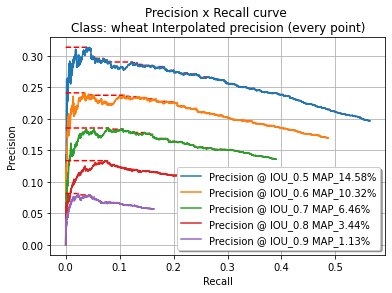

In [ ]:
###########################################################################################
#                                                                                         #
# This sample shows how to evaluate object detections applying the following metrics:     #
#  * Precision x Recall curve       ---->       used by VOC PASCAL 2012)                  #
#  * Average Precision (AP)         ---->       used by VOC PASCAL 2012)                  #
#                                                                                         #
# Developed by: Rafael Padilla (rafael.padilla@smt.ufrj.br)                               #
#        SMT - Signal Multimedia and Telecommunications Lab                               #
#        COPPE - Universidade Federal do Rio de Janeiro                                   #
#        Last modification: Oct 9th 2018                                                 #
###########################################################################################

import argparse
import glob
import os
import shutil
# from argparse import RawTextHelpFormatter
import sys

# Validate formats
def ValidateFormats(argFormat, argName, errors):
    if argFormat == 'xywh':
        return BBFormat.XYWH
    elif argFormat == 'xyrb':
        return BBFormat.XYX2Y2
    elif argFormat is None:
        return BBFormat.XYWH  # default when nothing is passed
    else:
        errors.append(
            'argument %s: invalid value. It must be either \'xywh\' or \'xyrb\'' % argName)


# Validate mandatory args
def ValidateMandatoryArgs(arg, argName, errors):
    if arg is None:
        errors.append('argument %s: required argument' % argName)
    else:
        return True


def ValidateImageSize(arg, argName, argInformed, errors):
    errorMsg = 'argument %s: required argument if %s is relative' % (argName, argInformed)
    ret = None
    if arg is None:
        errors.append(errorMsg)
    else:
        arg = arg.replace('(', '').replace(')', '')
        args = arg.split(',')
        if len(args) != 2:
            errors.append(
                '%s. It must be in the format \'width,height\' (e.g. \'600,400\')' % errorMsg)
        else:
            if not args[0].isdigit() or not args[1].isdigit():
                errors.append(
                    '%s. It must be in INdiaTEGER the format \'width,height\' (e.g. \'600,400\')' %
                    errorMsg)
            else:
                ret = (int(args[0]), int(args[1]))
    return ret


# Validate coordinate types
def ValidateCoordinatesTypes(arg, argName, errors):
    if arg == 'abs':
        return CoordinatesType.Absolute
    elif arg == 'rel':
        return CoordinatesType.Relative
    elif arg is None:
        return CoordinatesType.Absolute  # default when nothing is passed
    errors.append('argument %s: invalid value. It must be either \'rel\' or \'abs\'' % argName)


def ValidatePaths(arg, nameArg, errors):
    if arg is None:
        errors.append('argument %s: invalid directory' % nameArg)
    elif os.path.isdir(arg) is False and os.path.isdir(os.path.join(currentPath, arg)) is False:
        errors.append('argument %s: directory does not exist \'%s\'' % (nameArg, arg))
    # elif os.path.isdir(os.path.join(currentPath, arg)) is True:
    #     arg = os.path.join(currentPath, arg)
    else:
        arg = os.path.join(currentPath, arg)
    return arg


def getBoundingBoxes(directory,
                     isGT,
                     bbFormat,
                     coordType,
                     allBoundingBoxes=None,
                     allClasses=None,
                     imgSize=(0, 0)):
    """Read txt files containing bounding boxes (ground truth and detections)."""
    if allBoundingBoxes is None:
        allBoundingBoxes = BoundingBoxes()
    if allClasses is None:
        allClasses = []
    # Read ground truths
    os.chdir(directory)
    files = glob.glob("*.txt")
    files.sort()
    # Read GT detections from txt file
    # Each line of the files in the groundtruths folder represents a ground truth bounding box
    # (bounding boxes that a detector should detect)
    # Each value of each line is  "class_id, x, y, width, height" respectively
    # Class_id represents the class of the bounding box
    # x, y represents the most top-left coordinates of the bounding box
    # x2, y2 represents the most bottom-right coordinates of the bounding box
    for f in files:
        nameOfImage = f.replace(".txt", "")
        fh1 = open(f, "r")
        for line in fh1:
            line = line.replace("\n", "")
            if line.replace(' ', '') == '':
                continue
            splitLine = line.split(" ")
            if isGT:
                # idClass = int(splitLine[0]) #class
                idClass = (splitLine[0])  # class
                x = float(splitLine[1])
                y = float(splitLine[2])
                w = float(splitLine[3])
                h = float(splitLine[4])
                bb = BoundingBox(
                    nameOfImage,
                    idClass,
                    x,
                    y,
                    w,
                    h,
                    coordType,
                    imgSize,
                    BBType.GroundTruth,
                    format=bbFormat)
            else:
                # idClass = int(splitLine[0]) #class
                idClass = (splitLine[0])  # class
                confidence = float(splitLine[1])
                x = float(splitLine[2])
                y = float(splitLine[3])
                w = float(splitLine[4])
                h = float(splitLine[5])
                bb = BoundingBox(
                    nameOfImage,
                    idClass,
                    x,
                    y,
                    w,
                    h,
                    coordType,
                    imgSize,
                    BBType.Detected,
                    confidence,
                    format=bbFormat)
            allBoundingBoxes.addBoundingBox(bb)
            if idClass not in allClasses:
                allClasses.append(idClass)
        fh1.close()
    return allBoundingBoxes, allClasses

# Get current path to set default folders
# currentPath = os.path.dirname(os.path.abspath(__file__))
currentPath = output_dir

VERSION = '0.1 (beta)'

parser = argparse.ArgumentParser(
    prog='Object Detection Metrics - Pascal VOC',
    description='This project applies the most popular metrics used to evaluate object detection '
    'algorithms.\nThe current implemention runs the Pascal VOC metrics.\nFor further references, '
    'please check:\nhttps://github.com/rafaelpadilla/Object-Detection-Metrics',
    epilog="Developed by: Rafael Padilla (rafael.padilla@smt.ufrj.br)")
# formatter_class=RawTextHelpFormatter)
parser.add_argument('-v', '--version', action='version', version='%(prog)s ' + VERSION)
# Positional arguments
# Mandatory
parser.add_argument(
    '-gt',
    '--gtfolder',
    dest='gtFolder',
    default=os.path.join(currentPath, 'groundtruths'),
    metavar='',
    help='folder containing your ground truth bounding boxes')
parser.add_argument(
    '-det',
    '--detfolder',
    dest='detFolder',
    default=os.path.join(currentPath, 'detections'),
    metavar='',
    help='folder containing your detected bounding boxes')
# Optional
parser.add_argument(
    '-t',
    '--threshold',
    dest='iouThreshold',
    type=float,
    default=0.5,
    metavar='',
    help='IOU threshold. Default 0.5')
parser.add_argument(
    '-gtformat',
    dest='gtFormat',
    metavar='',
    default='xywh',
    help='format of the coordinates of the ground truth bounding boxes: '
    '(\'xywh\': <left> <top> <width> <height>)'
    ' or (\'xyrb\': <left> <top> <right> <bottom>)')
parser.add_argument(
    '-detformat',
    dest='detFormat',
    metavar='',
    default='xywh',
    help='format of the coordinates of the detected bounding boxes '
    '(\'xywh\': <left> <top> <width> <height>) '
    'or (\'xyrb\': <left> <top> <right> <bottom>)')
parser.add_argument(
    '-gtcoords',
    dest='gtCoordinates',
    default='abs',
    metavar='',
    help='reference of the ground truth bounding box coordinates: absolute '
    'values (\'abs\') or relative to its image size (\'rel\')')
parser.add_argument(
    '-detcoords',
    default='abs',
    dest='detCoordinates',
    metavar='',
    help='reference of the ground truth bounding box coordinates: '
    'absolute values (\'abs\') or relative to its image size (\'rel\')')
parser.add_argument(
    '-imgsize',
    dest='imgSize',
    metavar='',
    help='image size. Required if -gtcoords or -detcoords are \'rel\'')
parser.add_argument(
    '-sp', '--savepath', dest='savePath', metavar='', help='folder where the plots are saved')
parser.add_argument(
    '-np',
    '--noplot',
    dest='showPlot',
    action='store_false',
    help='no plot is shown during execution')
# args = parser.parse_args()
args = parser.parse_args(['--det', dt_dir, '--gt', gt_dir, '--t', '0.1'])

iouThreshold = args.iouThreshold

# Arguments validation
errors = []
# Validate formats
gtFormat = ValidateFormats(args.gtFormat, '-gtformat', errors)
detFormat = ValidateFormats(args.detFormat, '-detformat', errors)
# Groundtruth folder
if ValidateMandatoryArgs(args.gtFolder, '-gt/--gtfolder', errors):
    gtFolder = ValidatePaths(args.gtFolder, '-gt/--gtfolder', errors)
else:
    # errors.pop()
    gtFolder = os.path.join(currentPath, 'groundtruths')
    if os.path.isdir(gtFolder) is False:
        errors.append('folder %s not found' % gtFolder)
# Coordinates types
gtCoordType = ValidateCoordinatesTypes(args.gtCoordinates, '-gtCoordinates', errors)
detCoordType = ValidateCoordinatesTypes(args.detCoordinates, '-detCoordinates', errors)
imgSize = (0, 0)
if gtCoordType == CoordinatesType.Relative:  # Image size is required
    imgSize = ValidateImageSize(args.imgSize, '-imgsize', '-gtCoordinates', errors)
if detCoordType == CoordinatesType.Relative:  # Image size is required
    imgSize = ValidateImageSize(args.imgSize, '-imgsize', '-detCoordinates', errors)
# Detection folder
if ValidateMandatoryArgs(args.detFolder, '-det/--detfolder', errors):
    detFolder = ValidatePaths(args.detFolder, '-det/--detfolder', errors)
else:
    # errors.pop()
    detFolder = os.path.join(currentPath, 'detections')
    if os.path.isdir(detFolder) is False:
        errors.append('folder %s not found' % detFolder)
if args.savePath is not None:
    savePath = ValidatePaths(args.savePath, '-sp/--savepath', errors)
else:
    savePath = os.path.join(currentPath, 'results')
# Validate savePath
# If error, show error messages
if len(errors) != 0:
    print("""usage: Object Detection Metrics [-h] [-v] [-gt] [-det] [-t] [-gtformat]
                                [-detformat] [-save]""")
    print('Object Detection Metrics: error(s): ')
    [print(e) for e in errors]
    sys.exit()

methodtoApply = MethodAveragePrecision.EveryPointInterpolation #EveryPointInterpolation, #ElevenPointInterpolation

savePath = "{}/{}".format(output_dir, methodtoApply)
# Create directory to save results
shutil.rmtree(savePath, ignore_errors=True)  # Clear folder
os.makedirs(savePath)
# Show plot during execution
showPlot = args.showPlot

print('iouThreshold= %f' % iouThreshold)
print('savePath = %s' % savePath)
print('gtFormat = %s' % gtFormat)
print('detFormat = %s' % detFormat)
print('gtFolder = %s' % gtFolder)
print('detFolder = %s' % detFolder)
print('gtCoordType = %s' % gtCoordType)
print('detCoordType = %s' % detCoordType)
print('showPlot %s' % showPlot)
print('method: '+str(methodtoApply))

# Get groundtruth boxes
allBoundingBoxes, allClasses = getBoundingBoxes(
    gtFolder, True, gtFormat, gtCoordType, imgSize=imgSize)
# Get detected boxes
allBoundingBoxes, allClasses = getBoundingBoxes(
    detFolder, False, detFormat, detCoordType, allBoundingBoxes, allClasses, imgSize=imgSize)
allClasses.sort()

evaluator = Evaluator()
acc_AP = 0
validClasses = 0

# iouThresholds = [0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
iouThresholds = [0.5, 0.6, 0.7, 0.8, 0.9]

# Plot Precision x Recall curve
evaluator.PlotPrecisionRecallCurve(
    allBoundingBoxes,  # Object containing all bounding boxes (ground truths and detections)
    IOUThresholds=iouThresholds,  # IOU threshold
    method=methodtoApply,
    showAP=True,  # Show Average Precision in the title of the plot
    showInterpolatedPrecision=True,  # Don't plot the interpolated precision curve
    savePath=savePath,
    showGraphic=showPlot)


### THE END
